Comprehensive EDA, class consolidation and SVM

In [1]:

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from scipy.stats import zscore
import fasttext
import os
%matplotlib inline



In [2]:
# read the data
data = pd.read_csv('music_genre.csv')
data.corr()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
instance_id,1.000000,0.006317,-0.005268,0.000372,-0.005848,0.009952,-0.004015,0.004737,0.006847,-0.005908,0.005385
popularity,0.006317,1.000000,-0.290453,0.356420,-0.083809,0.216345,-0.364960,-0.039468,0.317941,0.224309,0.124913
acousticness,-0.005268,-0.290453,1.000000,-0.347681,0.061862,-0.791250,0.387970,-0.109220,-0.730401,-0.163377,-0.270238
danceability,0.000372,0.356420,-0.347681,1.000000,-0.155507,0.263934,-0.301277,-0.051465,0.390859,0.279767,0.434557
duration_ms,-0.005848,-0.083809,0.061862,-0.155507,1.000000,-0.066203,0.129738,0.019911,-0.102509,-0.083636,-0.130574
energy,0.009952,0.216345,-0.791250,0.263934,-0.066203,1.000000,-0.389730,0.186731,0.838399,0.158180,0.396317
instrumentalness,-0.004015,-0.364960,0.387970,-0.301277,0.129738,-0.389730,1.000000,-0.093537,-0.529030,-0.199137,-0.272780
liveness,0.004737,-0.039468,-0.109220,-0.051465,0.019911,0.186731,-0.093537,1.000000,0.126504,0.114475,0.052110
loudness,0.006847,0.317941,-0.730401,0.390859,-0.102509,0.838399,-0.529030,0.126504,1.000000,0.165578,0.340664
speechiness,-0.005908,0.224309,-0.163377,0.279767,-0.083636,0.158180,-0.199137,0.114475,0.165578,1.000000,0.059847


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50005 entries, 0 to 50004
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [4]:
data[data.isnull().any(axis=1)]

,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
10000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10003,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10004,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:


data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()
# create a dictionary to map original categories to consolidated categories
category_map = {'Classical': 'Classical music',
                'Anime': 'Anime',
                'Hip-Hop': 'Hip-Hop and Rap',
                'Rap': 'Hip-Hop and Rap',
                'Jazz': 'Jazz, Blues and Electronic',
                'Blues': 'Jazz, Blues and Electronic',
                'Electronic': 'Jazz, Blues and Electronic',
                'Rock': 'Rock, Alternative and Country',
                'Alternative': 'Rock, Alternative and Country',
                'Country': 'Rock, Alternative and Country'}

# use replace method to map original categories to consolidated categories
data['music_genre'] = data['music_genre'].replace(category_map)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instance_id       50000 non-null  float64
 1   artist_name       50000 non-null  object 
 2   track_name        50000 non-null  object 
 3   popularity        50000 non-null  float64
 4   acousticness      50000 non-null  float64
 5   danceability      50000 non-null  float64
 6   duration_ms       50000 non-null  float64
 7   energy            50000 non-null  float64
 8   instrumentalness  50000 non-null  float64
 9   key               50000 non-null  object 
 10  liveness          50000 non-null  float64
 11  loudness          50000 non-null  float64
 12  mode              50000 non-null  object 
 13  speechiness       50000 non-null  float64
 14  tempo             50000 non-null  object 
 15  obtained_date     50000 non-null  object 
 16  valence           50000 non-null  float6

In [6]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,valence
count,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,55888.396360,44.220420,0.306383,0.558241,2.212526e+05,0.599755,0.181601,0.193896,-9.133761,0.093586,0.456264
std,20725.256253,15.542008,0.341340,0.178632,1.286720e+05,0.264559,0.325409,0.161637,6.162990,0.101373,0.247119
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,0.000000
25%,37973.500000,34.000000,0.020000,0.442000,1.748000e+05,0.433000,0.000000,0.096900,-10.860000,0.036100,0.257000
50%,55913.500000,45.000000,0.144000,0.568000,2.192810e+05,0.643000,0.000158,0.126000,-7.276500,0.048900,0.448000
75%,73863.250000,56.000000,0.552000,0.687000,2.686122e+05,0.815000,0.155000,0.244000,-5.173000,0.098525,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.830606e+06,0.999000,0.996000,1.000000,3.744000,0.942000,0.992000


In [7]:
data.describe(include=['O'])

,artist_name,track_name,key,mode,tempo,obtained_date,music_genre
count,50000,50000,50000,50000,50000,50000,50000
unique,6863,41699,12,2,29394,5,5
top,empty_field,Home,G,Major,?,4-Apr,"Jazz, Blues and Electronic"
freq,2489,16,5727,32099,4980,44748,15000


We can see that there are 17 features and one label column (music_genre). Out of the features, 12 are numerical (one of which, tempo, is missclassified and will be dealt with later), and 5 are categorical.
We can also already see hints to hidden missing values in 3 features ('tempo', 'artist_name' and 'duration_ms'). Those will be dealt with shortly one by one

In [8]:
# check if the data is balanced
data['music_genre'].value_counts()

Jazz, Blues and Electronic       15000
Rock, Alternative and Country    15000
Hip-Hop and Rap                  10000
Anime                             5000
Classical music                   5000
Name: music_genre, dtype: int64


There are 10 different genres with equal distribution (balanced data). This means the accuracy score will be a good metric to use


Exploring the features one by one:



Instance_id:


In [9]:
data = data.drop(columns=['instance_id'])


Artist's Names:


In [10]:


print(f"There are {data['artist_name'].nunique()} unique artists in the set")



There are 6863 unique artists in the set


In [11]:
data['artist_name'].describe()

count           50000
unique           6863
top       empty_field
freq             2489
Name: artist_name, dtype: object

In [12]:


missing_artist = data[data['artist_name'] == 'empty_field']
missing_artist.head()



,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
19,empty_field,7th Sevens,50.0,0.0281,0.656,307328.0,0.653,0.858000,F#,0.1120,-11.883,Minor,0.0396,117.999,4-Apr,0.199,"Jazz, Blues and Electronic"
25,empty_field,Revolution,34.0,0.0236,0.715,221050.0,0.978,0.000493,D,0.2160,-1.538,Major,0.3620,125.109,4-Apr,0.418,"Jazz, Blues and Electronic"
44,empty_field,World (The Price Of Love) - [Radio Edit] [2015...,31.0,0.0035,0.595,222147.0,0.904,0.003780,D,0.0533,-6.805,Minor,0.0349,127.61,4-Apr,0.841,"Jazz, Blues and Electronic"
128,empty_field,Down With Me - VIP,32.0,0.0139,0.498,-1.0,0.945,0.647000,F,0.3380,-0.003,Minor,0.1370,149.888,4-Apr,0.179,"Jazz, Blues and Electronic"
135,empty_field,Olvidela Compa,44.0,0.1530,0.792,265133.0,0.549,0.379000,F,0.3430,-9.855,Major,0.0456,120.01299999999999,4-Apr,0.476,"Jazz, Blues and Electronic"


In [13]:


print(f"Percent of missing artist names: {(missing_artist.shape[0]/data.shape[0])*100:2.4}%")



Percent of missing artist names: 4.978%



5% of the observations are missing the artist's names (marked as 'empty_field'), but these entries are still valid otherwise. we will not drop these observations

In [14]:


data[data['artist_name'] != 'empty_field'].groupby('artist_name')['music_genre'].nunique().value_counts(normalize=False)



1    6414
2     434
3      14
Name: music_genre, dtype: int64

For the entries that do contain an artist's name, it seems that a song that comes from a particular artist has an ~80% chance of belonging to one specific genre.

However, in it's current form it's not helpful for classifying songs from artists outside the training set. We'll need to extract more general features, starting with the simplest - name length.¶

In [15]:


# find the length of the artists names
data['length_name'] = data['artist_name'].str.len()



In [16]:


data[data['artist_name'] != 'empty_field'].groupby('music_genre')['length_name'].describe().T


music_genre,Anime,Classical music,Hip-Hop and Rap,"Jazz, Blues and Electronic","Rock, Alternative and Country"
count,4728.000000,4734.000000,9492.000000,14292.000000,14265.000000
mean,12.198604,16.336502,9.510324,11.923873,12.022292
std,5.419303,4.489369,4.009366,5.086414,4.499025
min,2.000000,4.000000,2.000000,1.000000,1.000000
25%,8.000000,13.000000,6.000000,9.000000,9.000000
50%,12.000000,15.000000,9.000000,11.000000,12.000000
75%,15.000000,20.000000,12.000000,14.000000,14.000000
max,35.000000,52.000000,38.000000,51.000000,46.000000


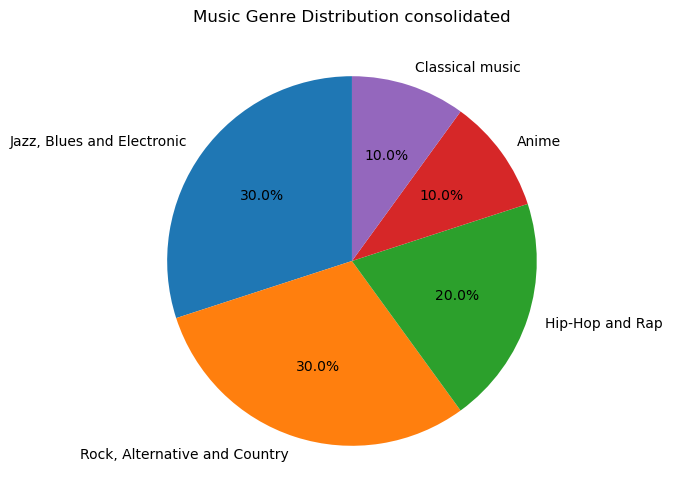

In [17]:
genre_counts = data['music_genre'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 6))
genre_counts.plot.pie(autopct='%.1f%%', startangle=90)
plt.title("Music Genre Distribution consolidated")
plt.ylabel('')  # Remove the y-axis label ('genre')

# Save the pie chart to a file
plt.savefig('music_genre_distribution consolidated.png', bbox_inches='tight')

# Show the pie chart (optional, since it's already saved)
plt.show()

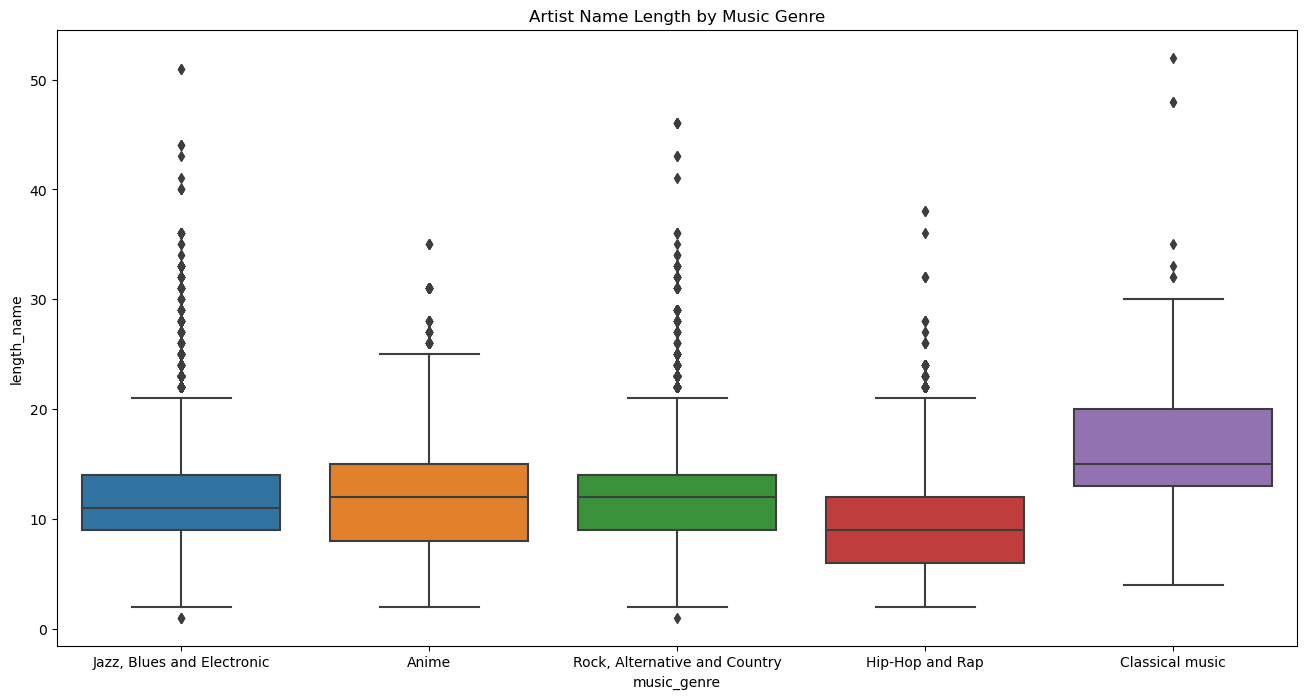

In [18]:


plt.figure(figsize=(16,8))
sns.boxplot(data=data[data['artist_name'] != 'empty_field'], x='music_genre', y='length_name')
# Add a title to the plot
plt.title('Artist Name Length by Music Genre')

# Save the plot as an image file
plt.savefig('artist_name_length_by_genre.png', bbox_inches='tight')
plt.show()




From the above statistics it seems that classical music tends to have noticeably longer names. Could potentialy be a useful feature. We'll keep it in for now

In [19]:
data['track_name'].describe()

count     50000
unique    41699
top        Home
freq         16
Name: track_name, dtype: object

In [20]:


# generate track name length
data['length_track_name'] = data['track_name'].str.len()



In [21]:


data.groupby('music_genre')['length_track_name'].describe()



,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,15.468000,12.620746,1.0,7.0,12.0,19.0,112.0
Classical music,5000.0,48.210400,27.889749,3.0,26.0,47.0,65.0,250.0
Hip-Hop and Rap,10000.0,16.367200,12.220642,1.0,8.0,12.0,21.0,139.0
"Jazz, Blues and Electronic",15000.0,18.375133,12.537053,1.0,10.0,15.0,23.0,142.0
"Rock, Alternative and Country",15000.0,17.054133,11.148089,1.0,10.0,14.0,21.0,127.0


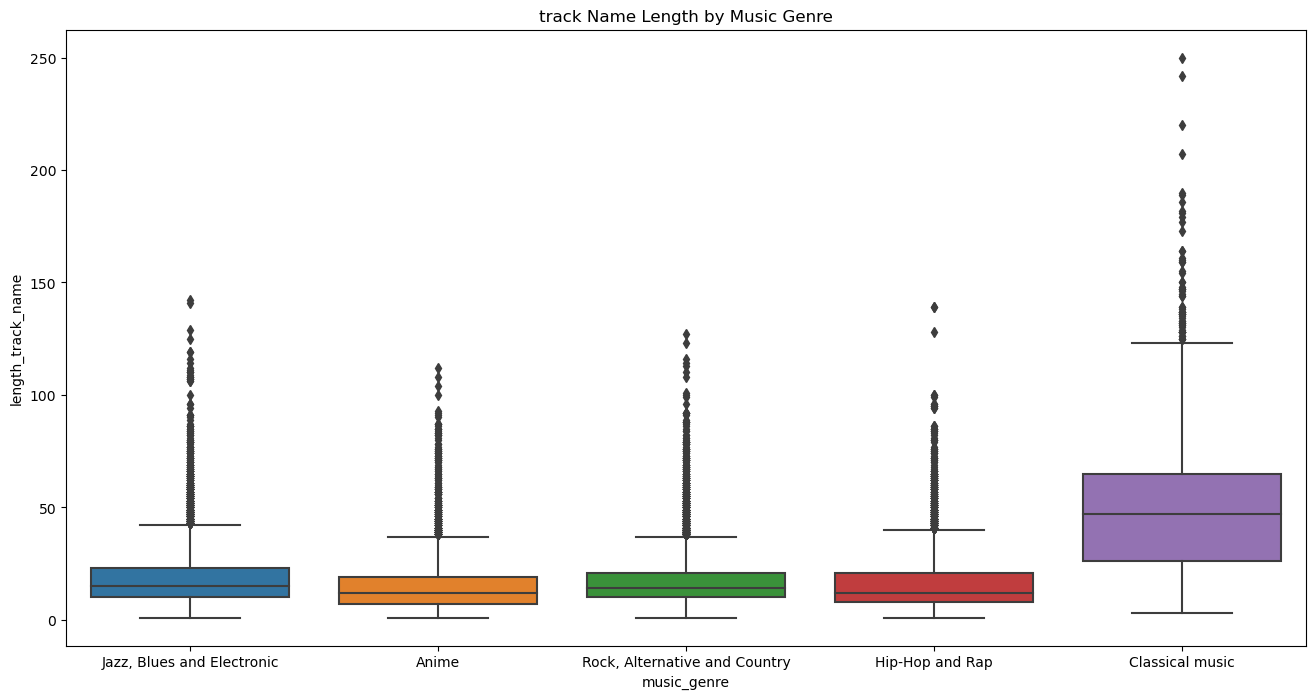

In [22]:
plt.figure(figsize=(16,8))
sns.boxplot(data=data, x='music_genre', y='length_track_name')
# Add a title to the plot
plt.title('track Name Length by Music Genre')

# Save the plot as an image file
plt.savefig('track_name_length_by_genre.png', bbox_inches='tight')
plt.show()

In [23]:
# Filter the data by the condition: music_genre equals 'Classical'
classical_data = data[data['music_genre'] == 'Classical music']

# Display the head of the filtered data
classical_data.head()



,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,length_name,length_track_name
40000,Ludwig van Beethoven,"Symphony No. 7 in A Major, Op. 92: II. Allegretto",0.0,0.861,0.250,568733.0,0.0210,0.035600,E,0.2490,-25.008,Minor,0.0385,123.736,4-Apr,0.0397,Classical music,20,49
40001,Andrea Bocelli,Un'Anima,44.0,0.788,0.119,271520.0,0.3460,0.000022,C#,0.1290,-8.093,Major,0.0376,64.63,5-Apr,0.1350,Classical music,14,8
40002,Wolfgang Amadeus Mozart,"Le nozze di Figaro, K.492 / Act 3: ""Sull’aria ...",48.0,0.991,0.183,210533.0,0.0702,0.000059,A#,0.4590,-22.228,Major,0.0521,71.221,4-Apr,0.1180,Classical music,23,71
40003,Ólafur Arnalds,partial,47.0,0.963,0.203,196088.0,0.1000,0.849000,F#,0.1390,-19.911,Minor,0.0390,66.717,4-Apr,0.0596,Classical music,14,7
40004,Franz Schubert,"Die Forelle, Op. 32, D. 550",23.0,0.985,0.367,-1.0,0.0902,0.003950,B,0.0821,-21.136,Major,0.0557,176.34799999999998,4-Apr,0.5650,Classical music,14,27


The classical genre also has longer track names. The difference is much more pronounced than for the artist's name. This is a better feature for us to use, since it doesn't have the missing values problem. We'll use this and not the artist name length feature.¶

In [24]:


# drop 'length_name' feature
data = data.drop(columns = ['length_name'])




Next we'll make a feature out off the sample's language. Specifically, whether it's written in Japanese. This may help us identify the Anime genre, which is likely to contain track/artist names written in the Japanese alphabet, as shown below:


In [25]:
# download pretrained language identification model
os.system(f"wget https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz")

--2023-03-18 07:47:30--  https://dl.fbaipublicfiles.com/fasttext/supervised-models/lid.176.ftz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 54.192.177.11, 54.192.177.93, 54.192.177.117, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|54.192.177.11|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 938013 (916K) [binary/octet-stream]
Saving to: ‘lid.176.ftz.12’

     0K .......... .......... .......... .......... ..........  5% 3.46M 0s
    50K .......... .......... .......... .......... .......... 10% 5.25M 0s
   100K .......... .......... .......... .......... .......... 16% 5.34M 0s
   150K .......... .......... .......... .......... .......... 21% 6.25M 0s
   200K .......... .......... .......... .......... .......... 27% 7.97M 0s
   250K .......... .......... .......... .......... .......... 32% 10.0M 0s
   300K .......... .......... .......... .......... .......... 38% 6.40M 0s
   350K .......... .......... .......... ......

0

In [26]:
data[data['music_genre'] == 'Anime'].head()

,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre,length_track_name
5000,Capcom Sound Team,終幕組曲【冒險の終わり】,11.0,0.01540,0.362,429560.0,0.456,0.024100,D,0.2580,-11.355,Minor,0.0376,117.634,4-Apr,0.332,Anime,12
5001,ayaka,そこまで歩いていくよ,26.0,0.82000,0.627,-1.0,0.350,0.000000,G,0.1250,-7.951,Major,0.0291,135.937,4-Apr,0.173,Anime,10
5002,Hachioji P,KiLLER LADY - Eight Mix,29.0,0.00857,0.643,234874.0,0.966,0.003310,A#,0.2550,-3.902,Minor,0.0442,131.982,4-Apr,0.912,Anime,23
5003,LiSA,Bad Sweet Trap,18.0,0.00711,0.585,229147.0,0.991,0.000002,F,0.1100,-2.817,Minor,0.1170,?,4-Apr,0.580,Anime,14
5004,Hiroyuki Sawano,Call Your Name,50.0,0.01450,0.567,268333.0,0.300,0.000000,B,0.0687,-8.421,Minor,0.0291,141.819,4-Apr,0.196,Anime,14


In [27]:
PRETRAINED_MODEL_PATH = 'lid.176.ftz'
model = fasttext.load_model(PRETRAINED_MODEL_PATH)

In [28]:
def find_japanese(df):
    '''
    returns a 1D-array of 0's ans 1's, as well as the confidence of each prediction.
    1 - if either the artist or track name is written in japanese.
    0 - otherwise
    ''' 
    jap = []
    confidence = []
    
    for _, row in df.iterrows():      
        pred_track, confidence_track = model.predict(row['track_name'])
        pred_track = pred_track[0].split('__')[-1]
        pred_artist, confidence_artist = model.predict(row['artist_name'])
        pred_artist = pred_artist[0].split('__')[-1]

        # check the confidence of the language detection
        if (pred_track == 'ja') or (pred_artist == 'ja'):
            jap.append(1)
            confidence.append(np.max([confidence_track[0], confidence_artist[0]]))
        else:
            jap.append(0)
    
    return jap, np.array(confidence)

In [29]:
data['Japanese'], confidence = find_japanese(data[['artist_name', 'track_name']])

In [30]:
print(f"The average confidence level for the japanese predictions is {confidence.mean():1.2} +\- {confidence.std():1.2}")

The average confidence level for the japanese predictions is 0.9 +\- 0.17


In [31]:


data.groupby('music_genre')['Japanese'].value_counts(normalize=True)



music_genre                    Japanese
Anime                          0           0.790000
                               1           0.210000
Classical music                0           0.993200
                               1           0.006800
Hip-Hop and Rap                0           0.994800
                               1           0.005200
Jazz, Blues and Electronic     0           0.998333
                               1           0.001667
Rock, Alternative and Country  0           0.997867
                               1           0.002133
Name: Japanese, dtype: float64

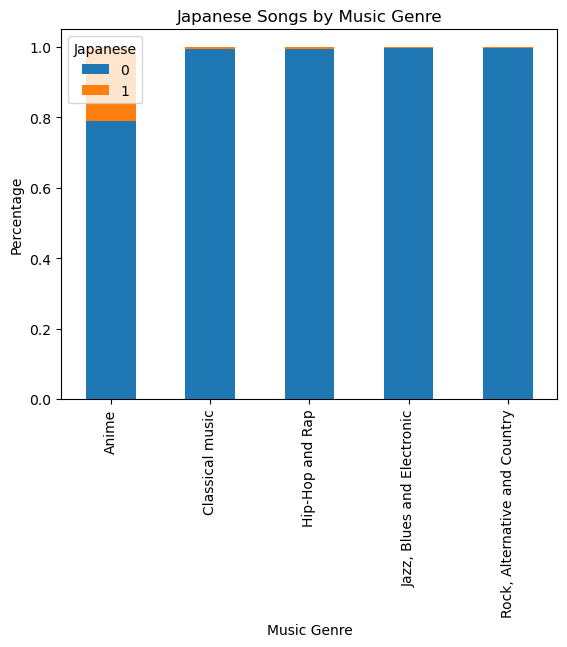

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

jap = data.groupby('music_genre')['Japanese'].value_counts(normalize=True)
jap = jap.unstack()
jap.plot(kind='bar', stacked=True)

plt.xlabel('Music Genre')
plt.ylabel('Percentage')
plt.title('Japanese Songs by Music Genre')

plt.show()

<Figure size 1000x600 with 0 Axes>

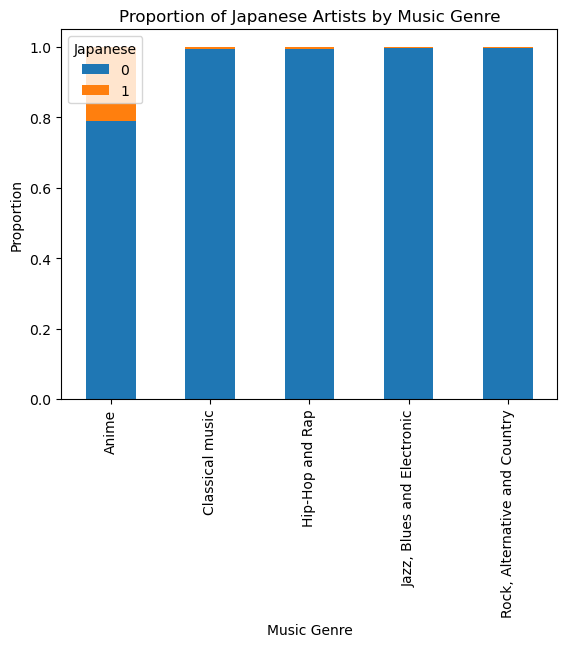

In [33]:
grouped_data = data.groupby('music_genre')['Japanese'].value_counts(normalize=True)

# Unstack the grouped data for easier plotting
unstacked_data = grouped_data.unstack(level=-1)

# Plot the bar chart
plt.figure(figsize=(10, 6))
unstacked_data.plot(kind='bar', stacked=True)
plt.title("Proportion of Japanese Artists by Music Genre")
plt.ylabel("Proportion")
plt.xlabel("Music Genre")

# Save the bar chart to a file
plt.savefig('japanese_artists_by_genre.png', bbox_inches='tight')

# Show the bar chart (optional, since it's already saved)
plt.show()

More than 20% of the Anime tracks are indeed written in Japanese, a much higher percentage than all the other music genres combined. This could indeed help us identify the Anime genre.

In [34]:


data = data.drop(columns=['artist_name', 'track_name'])



Popularity

In [35]:
data.groupby('music_genre')['popularity'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,24.271600,9.675151,0.0,17.0,23.0,30.0,65.0
Classical music,5000.0,29.315800,14.100519,0.0,25.0,32.0,38.0,68.0
Hip-Hop and Rap,10000.0,59.448500,8.297905,14.0,53.0,58.0,64.0,99.0
"Jazz, Blues and Electronic",15000.0,37.948133,9.968895,0.0,31.0,37.0,44.0,96.0
"Rock, Alternative and Country",15000.0,51.958467,10.095798,0.0,45.0,52.0,59.0,90.0


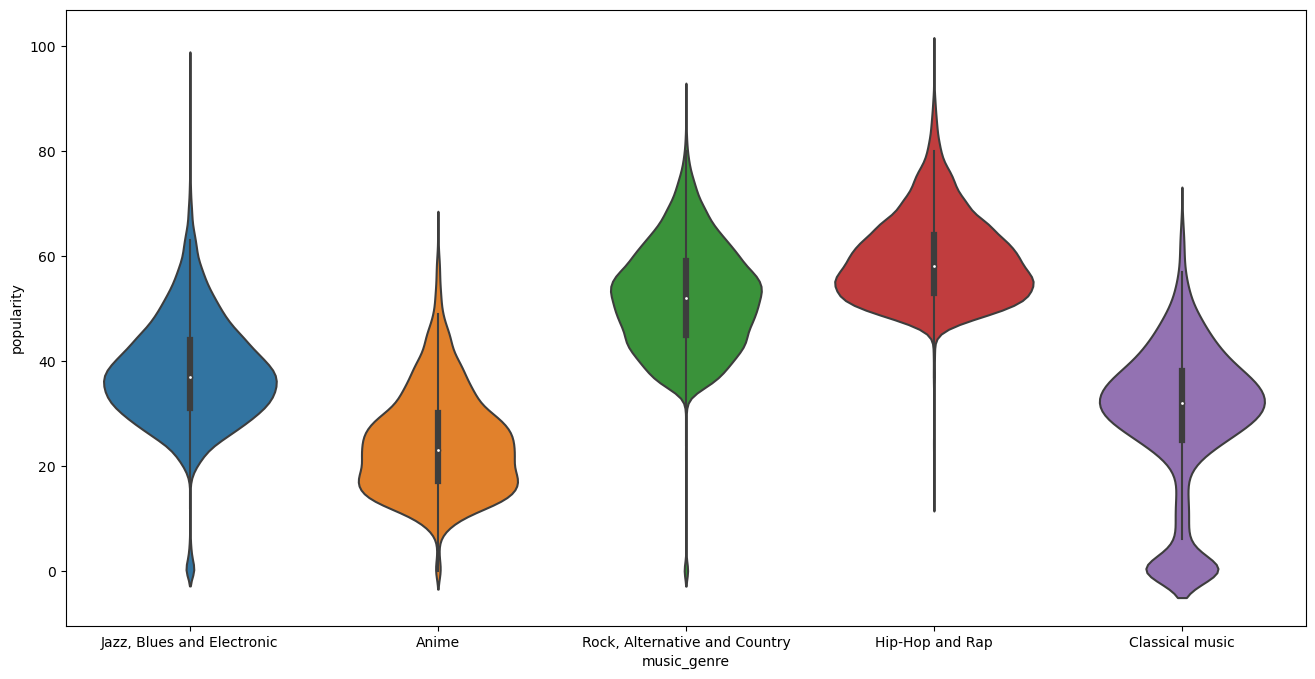

In [36]:


plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='music_genre', y='popularity')

# Save the violin plot as an image file
plt.savefig('popularity_by_music_genre_violin_plot.png', bbox_inches='tight')

# Show the violin plot (optional, since it's already saved)
plt.show()


This feature shows a nice spread of distributions for the different genres. Could definitely be useful for classification.

Rap, Hip-Hop and Rock seem to be the most popular genres, while Anime, Blues and Classical are the least popular. The other 4 genres are somewhere in between.

Acousticness:

In [37]:
data.groupby('music_genre')['acousticness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.286968,0.362371,0.000000,0.005193,0.0665,0.57600,0.996
Classical music,5000.0,0.869139,0.256728,0.000001,0.909000,0.9670,0.98800,0.996
Hip-Hop and Rap,10000.0,0.174075,0.190915,0.000007,0.029000,0.1020,0.26000,0.985
"Jazz, Blues and Electronic",15000.0,0.311455,0.325878,0.000002,0.020700,0.1710,0.58100,0.996
"Rock, Alternative and Country",15000.0,0.208402,0.255290,0.000001,0.010800,0.0886,0.33225,0.994


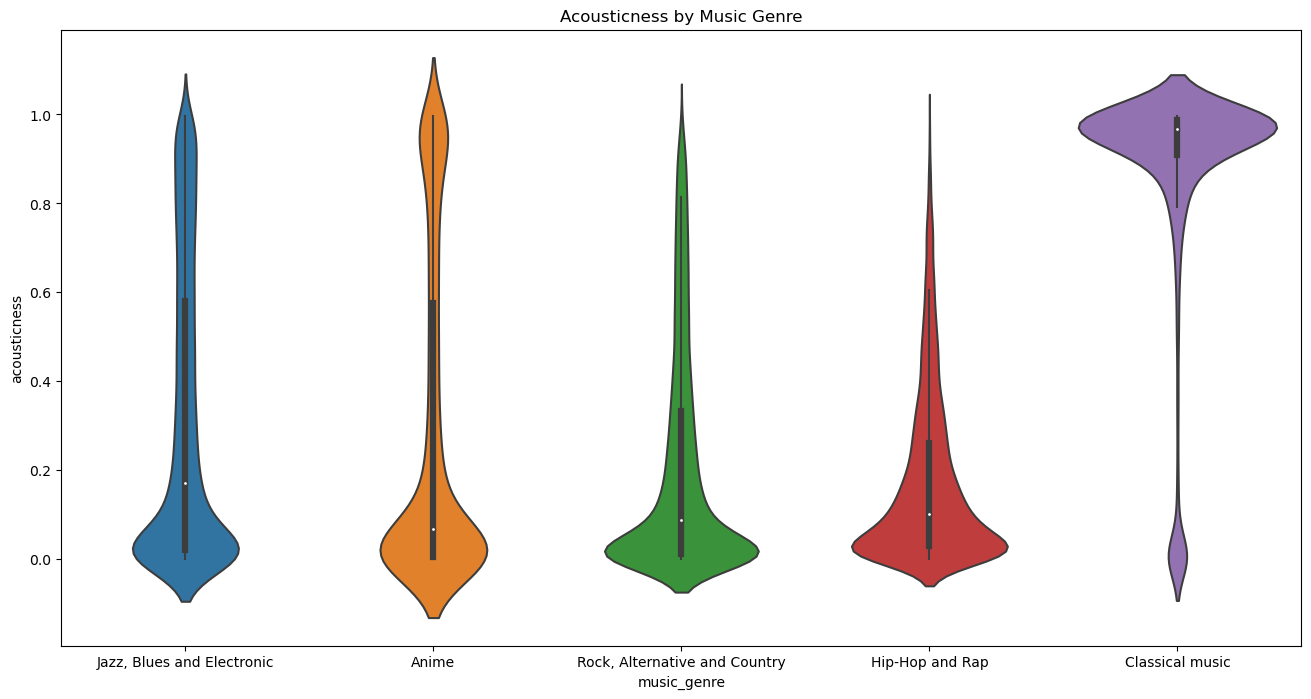

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is a Pandas DataFrame with columns 'music_genre' and 'acousticness'
# If you need to load data from a file, use the following line:
# data = pd.read_csv('your_file.csv') # Replace 'your_file.csv' with your file path

# Create the violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='music_genre', y='acousticness')

# Add a title to the plot
plt.title('Acousticness by Music Genre')

# Save the plot as an image file
plt.savefig('acousticness_by_genre_violinplot.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()


Danceability

In [39]:
data.groupby('music_genre')['danceability'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.471002,0.148760,0.0606,0.379,0.488,0.578,0.905
Classical music,5000.0,0.306560,0.135138,0.0600,0.198,0.301,0.402,0.775
Hip-Hop and Rap,10000.0,0.706989,0.135796,0.1970,0.621,0.723,0.808,0.986
"Jazz, Blues and Electronic",15000.0,0.577733,0.155031,0.0596,0.471,0.588,0.692,0.979
"Rock, Alternative and Country",15000.0,0.552557,0.133277,0.0617,0.468,0.557,0.642,0.971


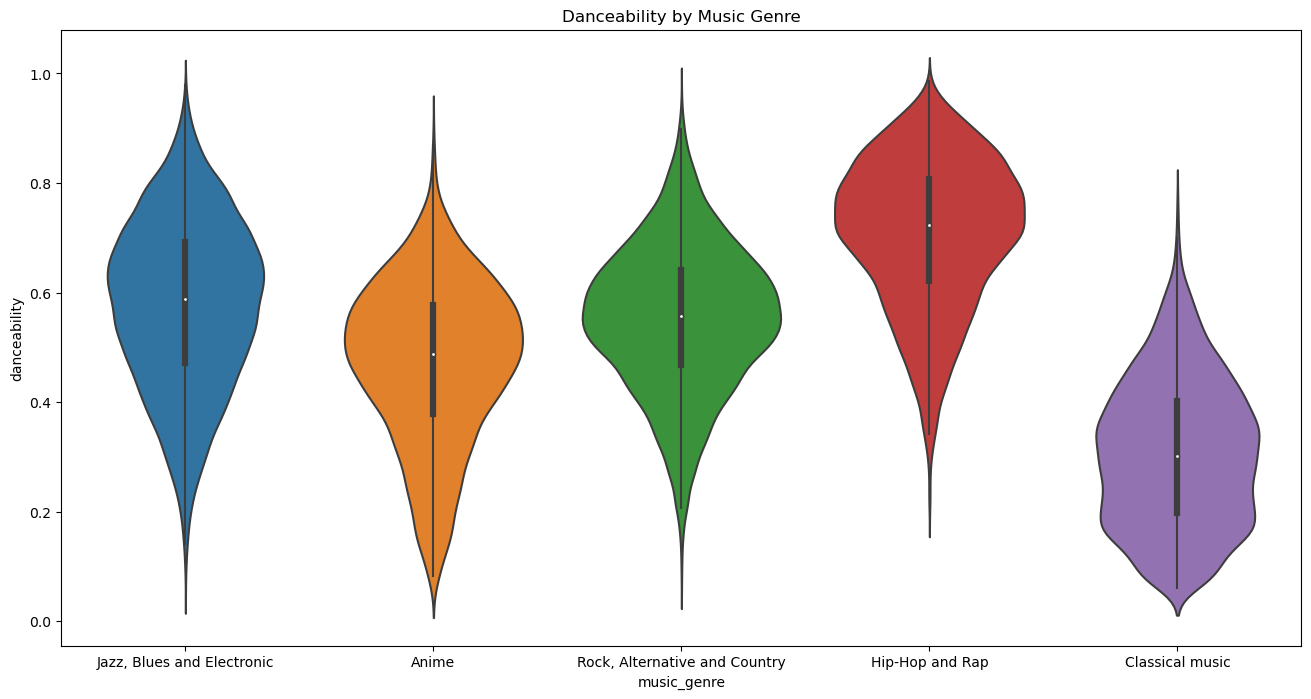

In [40]:
# Create the violin plot
plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='music_genre', y='danceability')

# Optionally, add a title to the plot
plt.title('Danceability by Music Genre')

# Save the violin plot as an image file
plt.savefig('danceability_by_genre_violin_plot.png', bbox_inches='tight')

# Show the violin plot (optional, since it's already saved)
plt.show()


Classical music sticks out again, but Rap and Hip-Hop can also be distinguished from the rest (they seem to go together often).


Duration

In [41]:
data.groupby('music_genre')['duration_ms'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,208880.829000,105275.946177,-1.0,146250.25,230205.5,272993.25,1295600.0
Classical music,5000.0,278014.346400,219698.722816,-1.0,148770.25,241640.0,362070.25,3195440.0
Hip-Hop and Rap,10000.0,197452.368900,86043.827783,-1.0,168012.00,208247.0,246419.75,723573.0
"Jazz, Blues and Electronic",15000.0,237315.642067,144071.955435,-1.0,178673.00,231253.5,294919.50,4830606.0
"Rock, Alternative and Country",15000.0,206259.729733,87932.479004,-1.0,183249.75,214486.5,248576.50,811077.0



-1.0 is obvously not a valid time measurement. These are missing values.¶


In [42]:
miss_duration = data[data['duration_ms'] == -1].shape[0]
num_obs_tot = data.shape[0]
print(f"There are {miss_duration} missing values, which accounts for {(miss_duration/num_obs_tot)*100:2.4}% of the data points.")

There are 4939 missing values, which accounts for 9.878% of the data points.


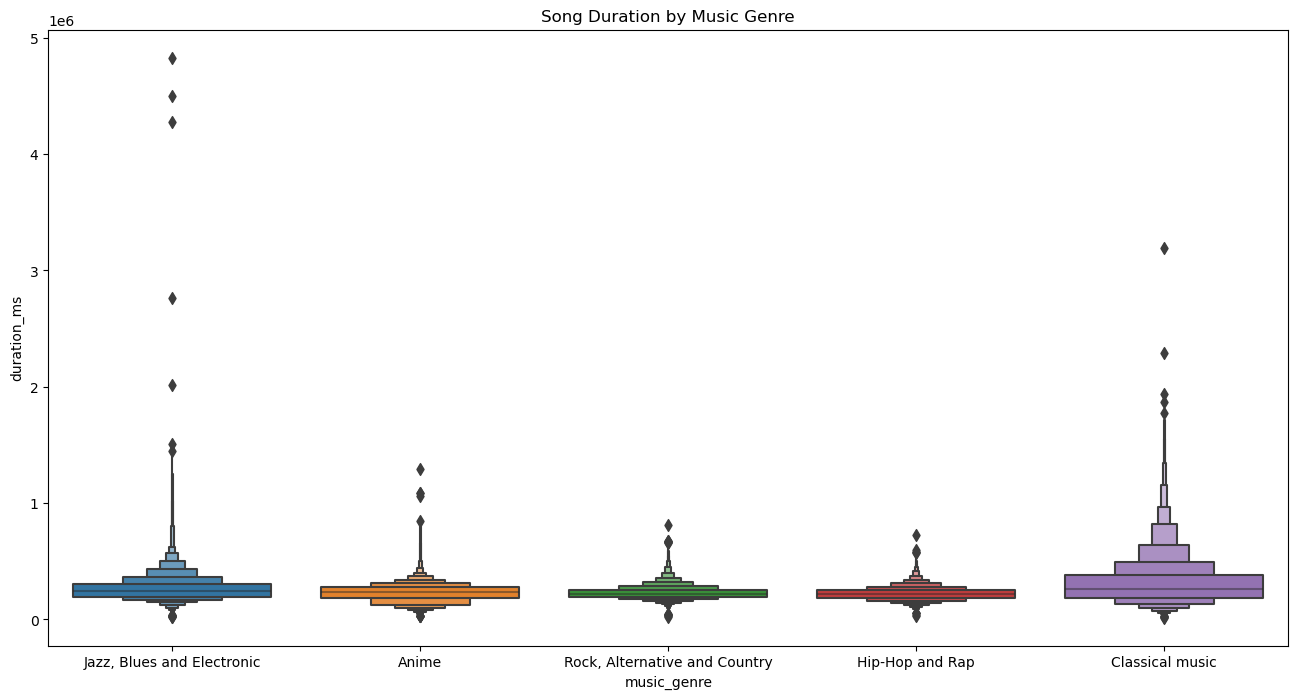

In [43]:


# Filter the data by the condition: duration_ms not equal to -1
filtered_data = data[data['duration_ms'] != -1]

# Plot the boxen plot
plt.figure(figsize=(16, 8))
sns.boxenplot(data=filtered_data, x='music_genre', y='duration_ms')
plt.title("Song Duration by Music Genre")

# Save the plot as an image file
plt.savefig('song_duration_by_genre_boxen.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()



Almost 10% of the entries are missing a duration. We don't want to remove such a large amount of observations, so we'll fill in the missing values with the median, but consider removing the feature entirely in the future.
Also of note is the fact that this feature contains extreme outliers. They could be important for classification, but we'll consider removing them at a later stage¶

In [44]:


# fill in median for missing values
mask_duration = data['duration_ms'] != -1
median_duration = data.loc[mask_duration, 'duration_ms'].median()
data.loc[~mask_duration, 'duration_ms'] = median_duration



Energy

In [45]:
data.groupby('music_genre')['energy'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.664568,0.300289,0.000943,0.4220,0.783,0.925,0.999
Classical music,5000.0,0.176534,0.225583,0.000792,0.0366,0.101,0.207,0.994
Hip-Hop and Rap,10000.0,0.647818,0.153350,0.079300,0.5420,0.649,0.757,0.997
"Jazz, Blues and Electronic",15000.0,0.607745,0.244475,0.002110,0.4330,0.632,0.812,0.999
"Rock, Alternative and Country",15000.0,0.679191,0.204532,0.002590,0.5340,0.712,0.848,0.998


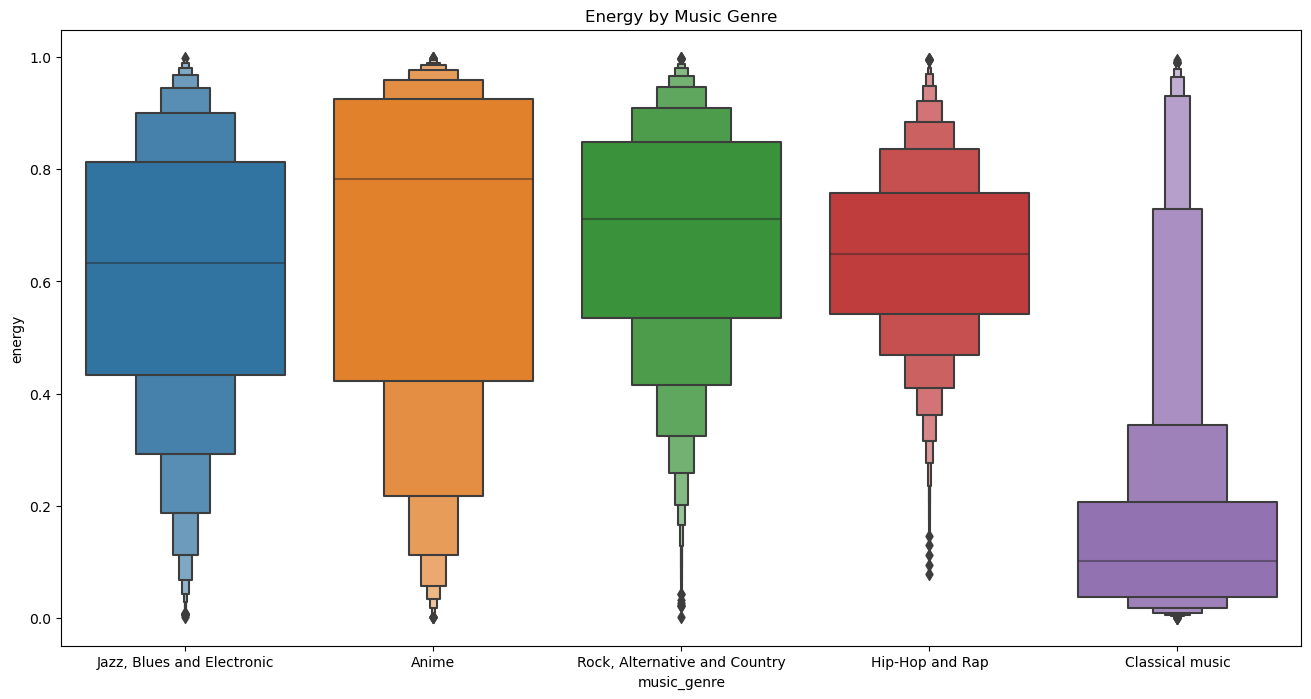

In [46]:


# Create the boxen plot
plt.figure(figsize=(16, 8))
sns.boxenplot(data=data, x='music_genre', y='energy')

# Add a title to the plot
plt.title('Energy by Music Genre')

# Save the plot as an image file
plt.savefig('energy_by_music_genre_boxenplot.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()




As usual, classical music stands out (and Jazz to a much lesser degree). Rap and Hip-Hop still match each other.


Instrumentalness

In [47]:


data.groupby('music_genre')['instrumentalness'].describe()



,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.278057,0.390610,0.0,0.000000,0.000400,0.76800,0.996
Classical music,5000.0,0.600692,0.378027,0.0,0.148750,0.832000,0.90500,0.994
Hip-Hop and Rap,10000.0,0.009960,0.069334,0.0,0.000000,0.000000,0.00001,0.927
"Jazz, Blues and Electronic",15000.0,0.265515,0.349905,0.0,0.000112,0.024300,0.59900,0.986
"Rock, Alternative and Country",15000.0,0.040265,0.143374,0.0,0.000000,0.000011,0.00135,0.974


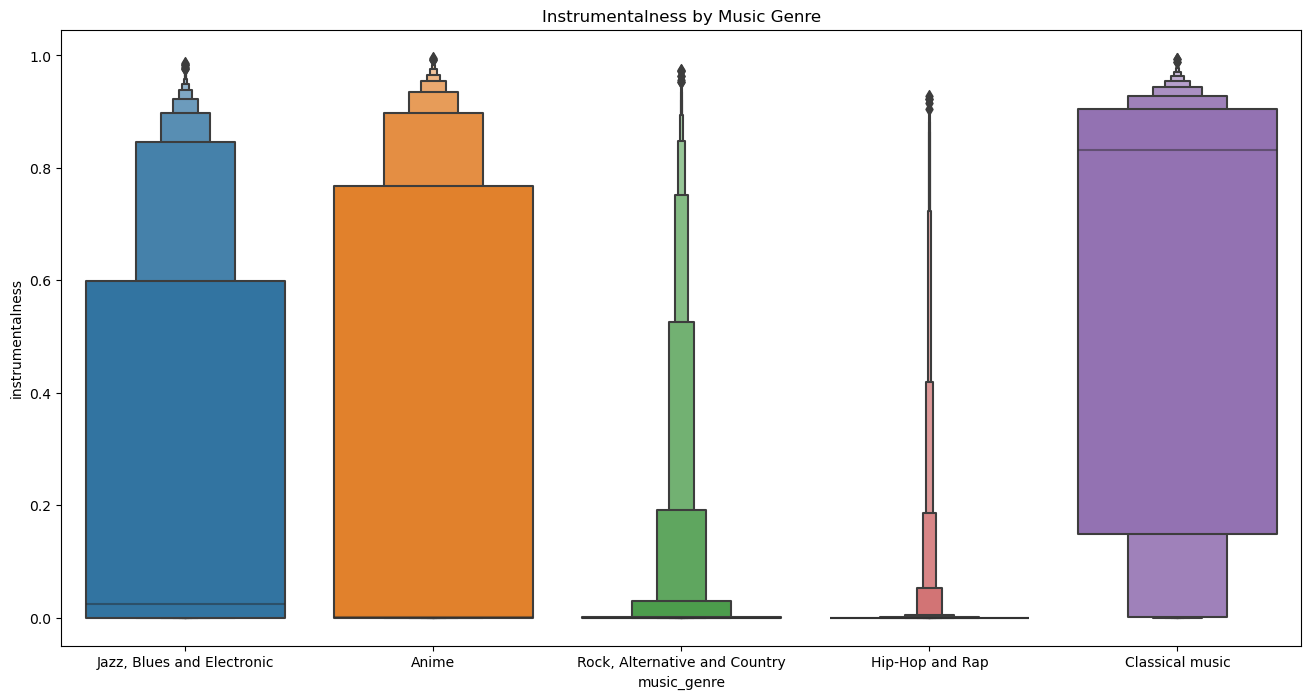

In [48]:


# Create the boxen plot
plt.figure(figsize=(16, 8))
sns.boxenplot(data=data, x='music_genre', y='instrumentalness')

# Add a title to the plot
plt.title('Instrumentalness by Music Genre')

# Save the plot as an image file
plt.savefig('instrumentalness_by_genre_boxen.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()


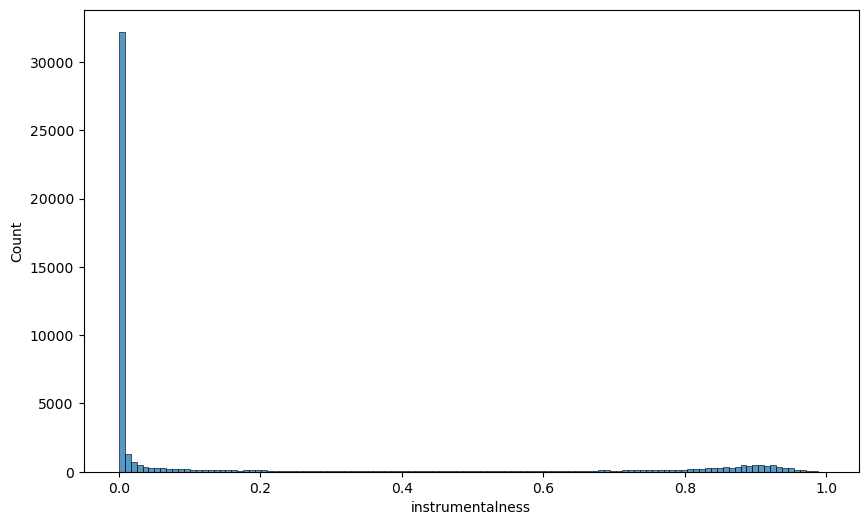

In [49]:
plt.figure(figsize=(10, 6))
sns.histplot(x='instrumentalness', data=data)

# Save the histogram plot as an image file
plt.savefig('instrumentalness_histogram.png', bbox_inches='tight')

# Show the histogram plot (optional, since it's already saved)
plt.show()

In [50]:
inst_0 = data[data['instrumentalness'] == 0].shape[0]
num_obs = data.shape[0]
print(f"There are {inst_0} observations with 0.0 instrumentalness, which accounts for {(inst_0/num_obs)*100:2.4}% of the data points")

There are 15001 observations with 0.0 instrumentalness, which accounts for 30.0% of the data points


Such a large number of 0.0 entries likely indicates missing values rather than real data points. Since this is a 3rd of our observations, we won't fill in missing values. Instead, we'll discard this feature entirely.

In [51]:
data = data.drop(columns=['instrumentalness'])

Key

In [52]:
data['key'].unique()

array(['A#', 'D', 'G#', 'C#', 'F#', 'B', 'G', 'F', 'A', 'C', 'E', 'D#'],
      dtype=object)

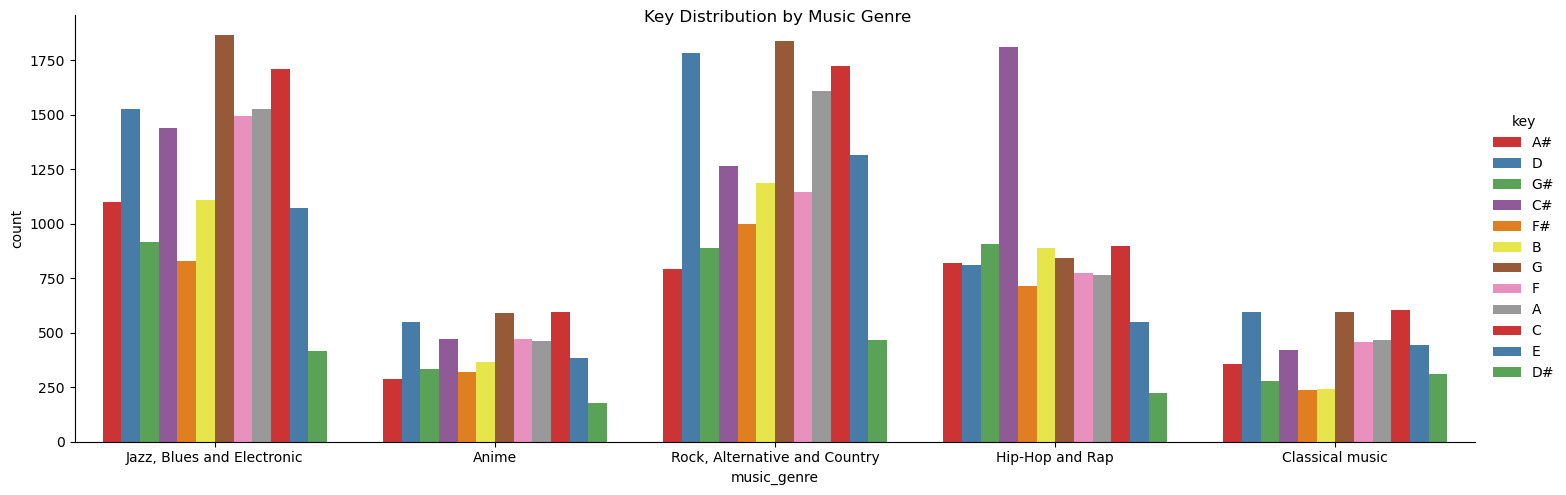

In [53]:
g = sns.catplot(x="music_genre", hue="key", data=data, kind="count", height=5, aspect=3.0, palette='Set1')

# Set plot title
g.fig.suptitle('Key Distribution by Music Genre')

# Save the catplot as an image file
g.savefig('key_distribution_by_genre.png', bbox_inches='tight')

# Show the catplot (optional, since it's already saved)
plt.show()

In [54]:
data.groupby('music_genre')['key'].describe()

,count,unique,top,freq
music_genre,,,,
Anime,5000,12,C,594
Classical music,5000,12,C,602
Hip-Hop and Rap,10000,12,C#,1810
"Jazz, Blues and Electronic",15000,12,G,1864
"Rock, Alternative and Country",15000,12,G,1836


In [55]:


# One Hot Encoding
data = pd.get_dummies(data, drop_first=True, prefix='key', columns=['key'])




Different genres have noticeably different spreads. We'll keep this feature, but use One Hot Encoding to make it useful.


Liveness

In [56]:
data.groupby('music_genre')['liveness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.193444,0.138930,0.01690,0.098800,0.137,0.27525,0.967
Classical music,5000.0,0.161046,0.143591,0.02250,0.088975,0.110,0.15700,0.987
Hip-Hop and Rap,10000.0,0.199453,0.152216,0.01960,0.103000,0.135,0.25825,0.989
"Jazz, Blues and Electronic",15000.0,0.204903,0.185515,0.00967,0.095800,0.125,0.25225,1.000
"Rock, Alternative and Country",15000.0,0.190287,0.153007,0.01570,0.097300,0.129,0.24200,0.996


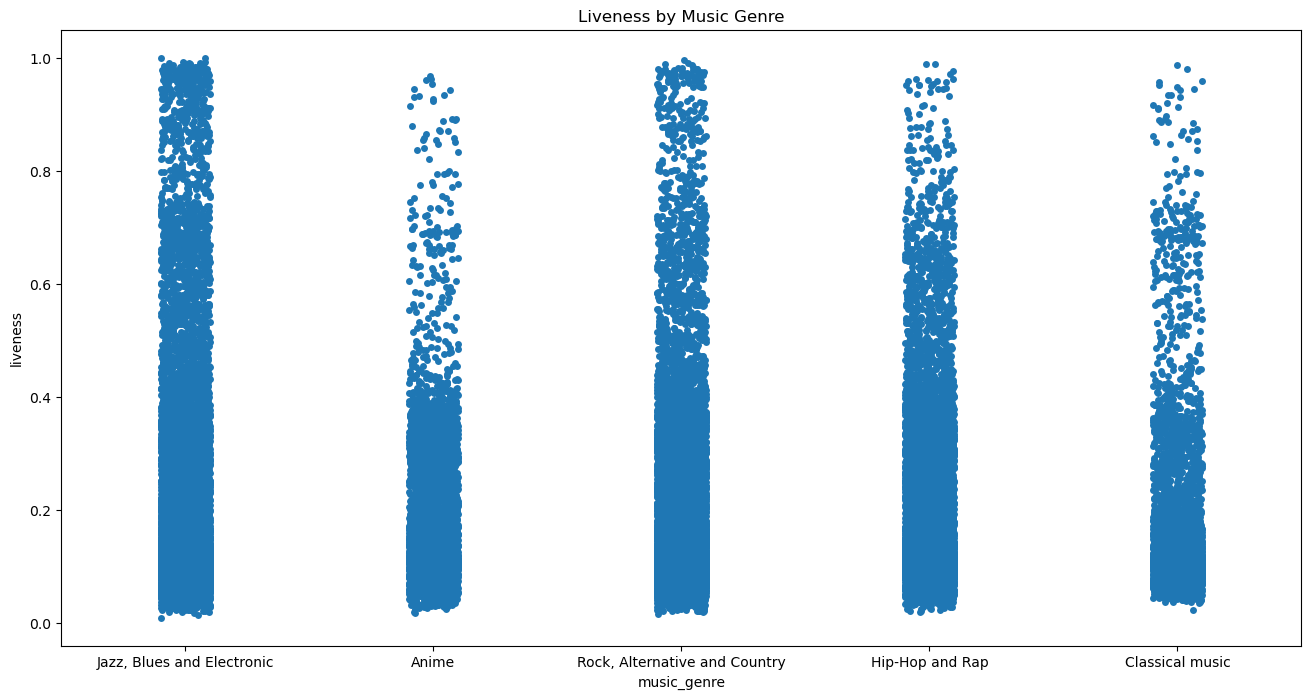

In [57]:


plt.figure(figsize=(16, 8))
sns.stripplot(data=data, x='music_genre', y='liveness', jitter=True)

# Add a title to the plot
plt.title('Liveness by Music Genre')

# Save the plot as an image file
plt.savefig('liveness_by_genre_stripplot.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()


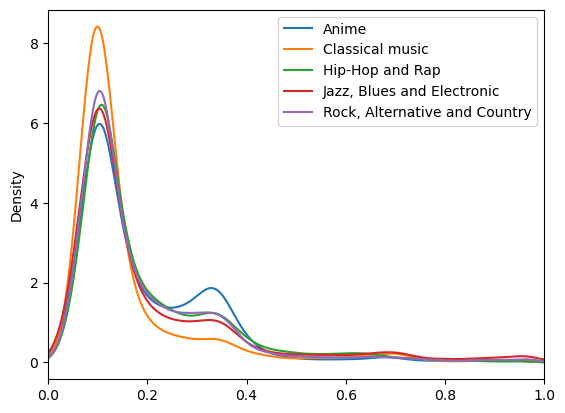

In [58]:
data.groupby('music_genre')['liveness'].plot.kde()
plt.legend()
plt.xlim([0, 1])

# Save the plot as an image file
plt.savefig('liveness_by_genre.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()


The distributions seem similarly skewed for all genres, so this feature will likely not contribute much to the model. We'll try both with and without this feature.


Loudness

In [59]:
data.groupby('music_genre')['loudness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,-7.963515,6.246825,-41.234,-10.69125,-5.6605,-3.58900,1.893
Classical music,5000.0,-21.586253,7.730315,-47.046,-26.44300,-21.8725,-17.23300,-2.304
Hip-Hop and Rap,10000.0,-6.759748,2.444085,-25.602,-8.07825,-6.4390,-5.11575,1.012
"Jazz, Blues and Electronic",15000.0,-9.076377,4.420294,-35.200,-11.48625,-8.4450,-5.92775,3.744
"Rock, Alternative and Country",15000.0,-7.013073,3.124698,-37.124,-8.57500,-6.3180,-4.78000,1.342


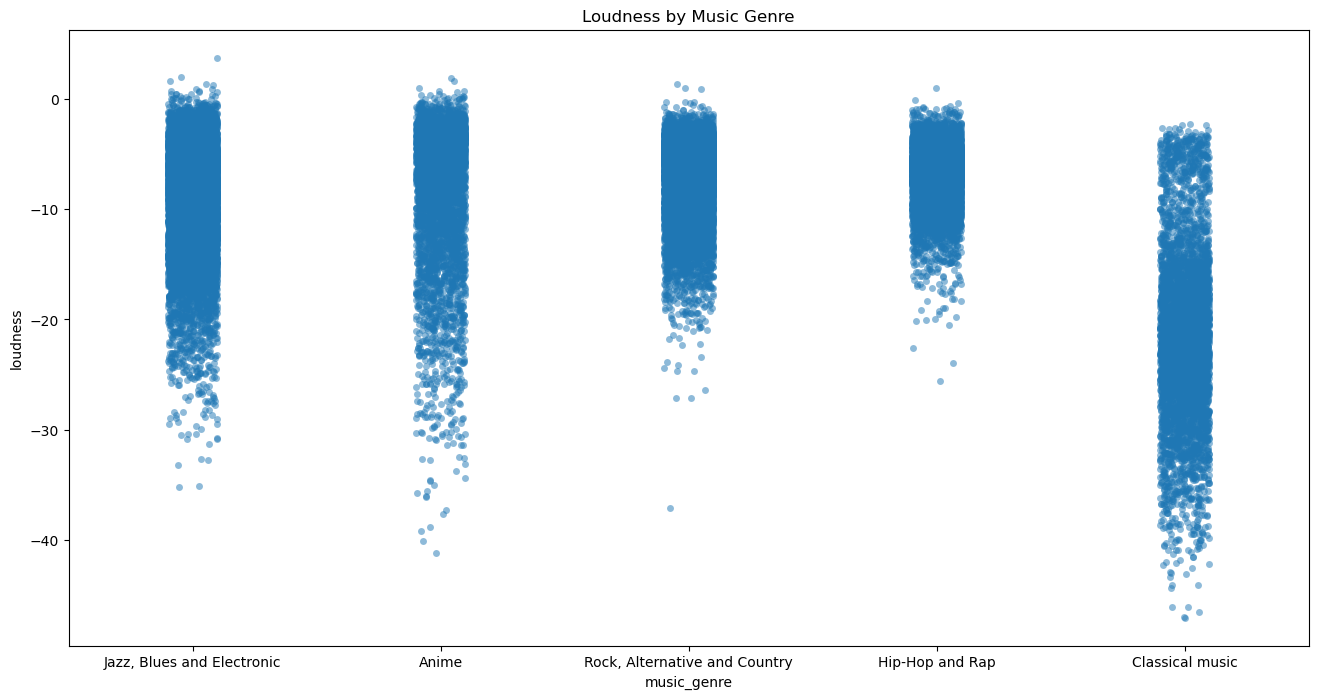

In [60]:
plt.figure(figsize=(16, 8))
sns.stripplot(data=data, x='music_genre', y='loudness', jitter=True, alpha=0.5)

# Add a title to the plot
plt.title('Loudness by Music Genre')

# Save the plot as an image file
plt.savefig('loudness_by_genre_strip_plot.png', bbox_inches='tight')

# Show the plot (optional, since it's already saved)
plt.show()


As usual, classical music is far from the rest, with Jazz (and Blues) also differing from the rest somewhat.¶


Mode

In [61]:
data['mode'].unique()

array(['Minor', 'Major'], dtype=object)

In [62]:
data.groupby('music_genre')['mode'].describe()

,count,unique,top,freq
music_genre,,,,
Anime,5000,2,Major,3101
Classical music,5000,2,Major,3328
Hip-Hop and Rap,10000,2,Major,5540
"Jazz, Blues and Electronic",15000,2,Major,8903
"Rock, Alternative and Country",15000,2,Major,11227


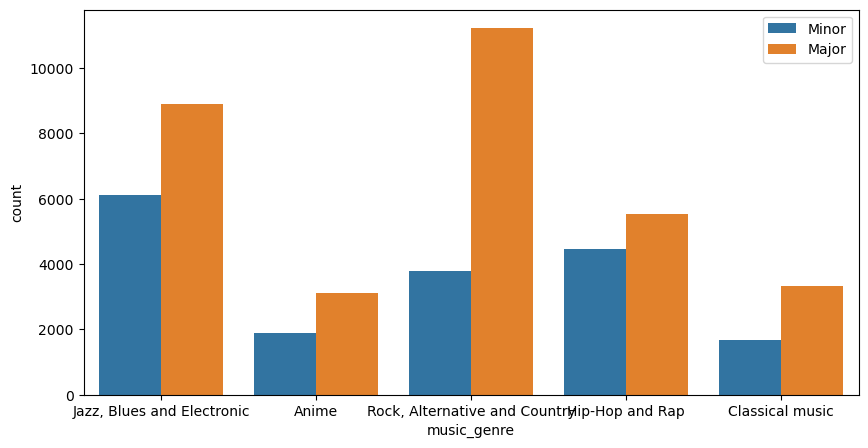

In [63]:
plt.figure(figsize=(10,5))
sns.countplot(x="music_genre", hue="mode",data=data)
plt.legend(loc=0)
plt.savefig('mode.png', dpi=300, bbox_inches='tight')
plt.show()


All genres seem to have a prefererence for the "Major" mode, but to different degrees. It is the most pronounced in the Country genre. We'll use this feature after one hot encoding.

In [64]:


# One Hot Encoding
data = pd.get_dummies(data, drop_first=True, columns=['mode'])



Speechiness

In [65]:
data.groupby('music_genre')['speechiness'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.064608,0.052907,0.0229,0.0348,0.0452,0.0708,0.498
Classical music,5000.0,0.051575,0.037965,0.0239,0.0384,0.0433,0.0506,0.631
Hip-Hop and Rap,10000.0,0.196875,0.135245,0.0229,0.0768,0.1740,0.2890,0.932
"Jazz, Blues and Electronic",15000.0,0.078226,0.083631,0.0226,0.0358,0.0470,0.0778,0.942
"Rock, Alternative and Country",15000.0,0.063751,0.067441,0.0223,0.0316,0.0398,0.0628,0.941


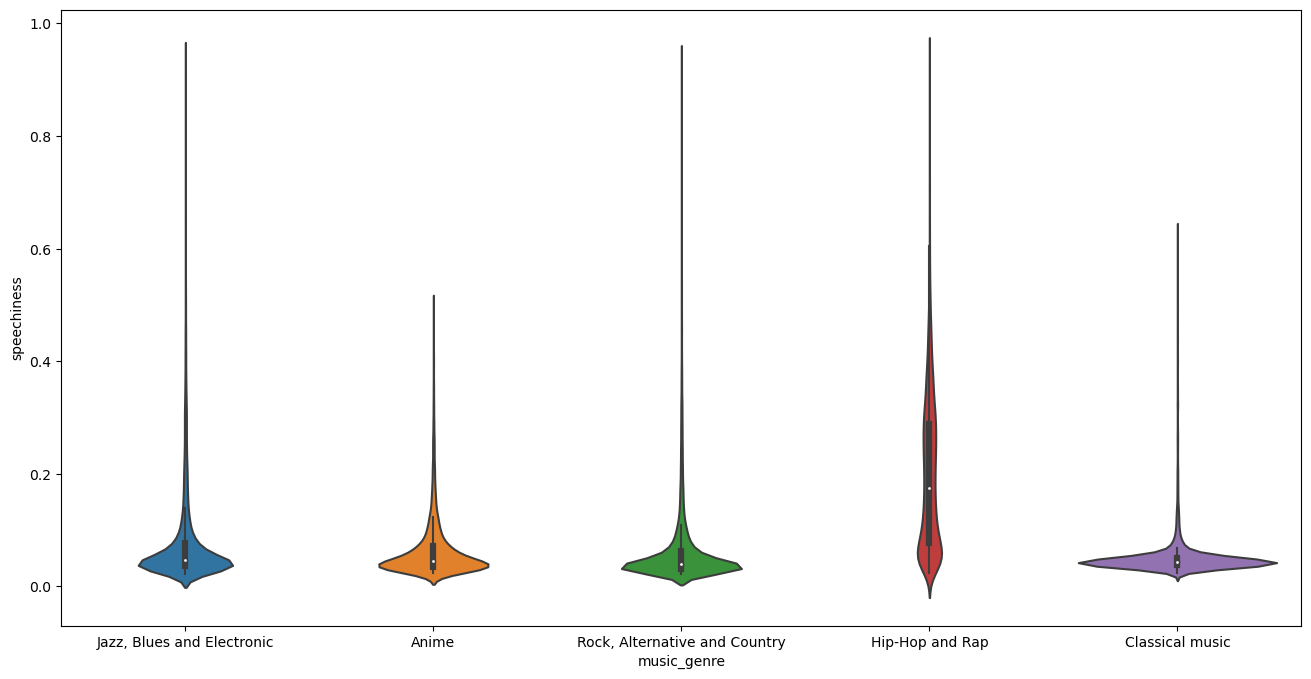

In [66]:


plt.figure(figsize=(16, 8))
sns.violinplot(data=data, x='music_genre', y='speechiness')
plt.savefig('speechiness.png', dpi=300, bbox_inches='tight')



This feature should contribute especially to identifying Hip-Hop and Rap.


Tempo

In [67]:
data.groupby('music_genre')['tempo'].describe()

,count,unique,top,freq
music_genre,,,,
Anime,5000,4134,?,503
Classical music,5000,4380,?,500
Hip-Hop and Rap,10000,6513,?,976
"Jazz, Blues and Electronic",15000,11333,?,1543
"Rock, Alternative and Country",15000,11021,?,1458



This feature should be numeric. The "?" is a missing value.


In [68]:


print(f"This feature contains {(data[data['tempo'] == '?'].shape[0]/data.shape[0])*100:2.4}% missing values")



This feature contains 9.96% missing values


In [69]:


# replace "?" with np.nan and correctly classify the feature:
data.loc[data['tempo'] == '?', 'tempo'] = np.nan
data = data.astype({'tempo': np.float64})



In [70]:
data.groupby('music_genre')['tempo'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,4497.0,126.799978,33.063462,47.704,98.96000,127.9720,149.98900,220.276
Classical music,4500.0,104.053190,30.944454,34.347,79.23325,96.5515,127.30200,212.923
Hip-Hop and Rap,9024.0,120.369435,29.582176,47.092,94.37350,120.3360,140.97100,213.788
"Jazz, Blues and Electronic",13457.0,119.637914,29.474551,34.765,95.99800,117.9890,139.94800,220.041
"Rock, Alternative and Country",13542.0,122.998245,29.748002,37.114,98.61050,121.4645,143.96575,219.331


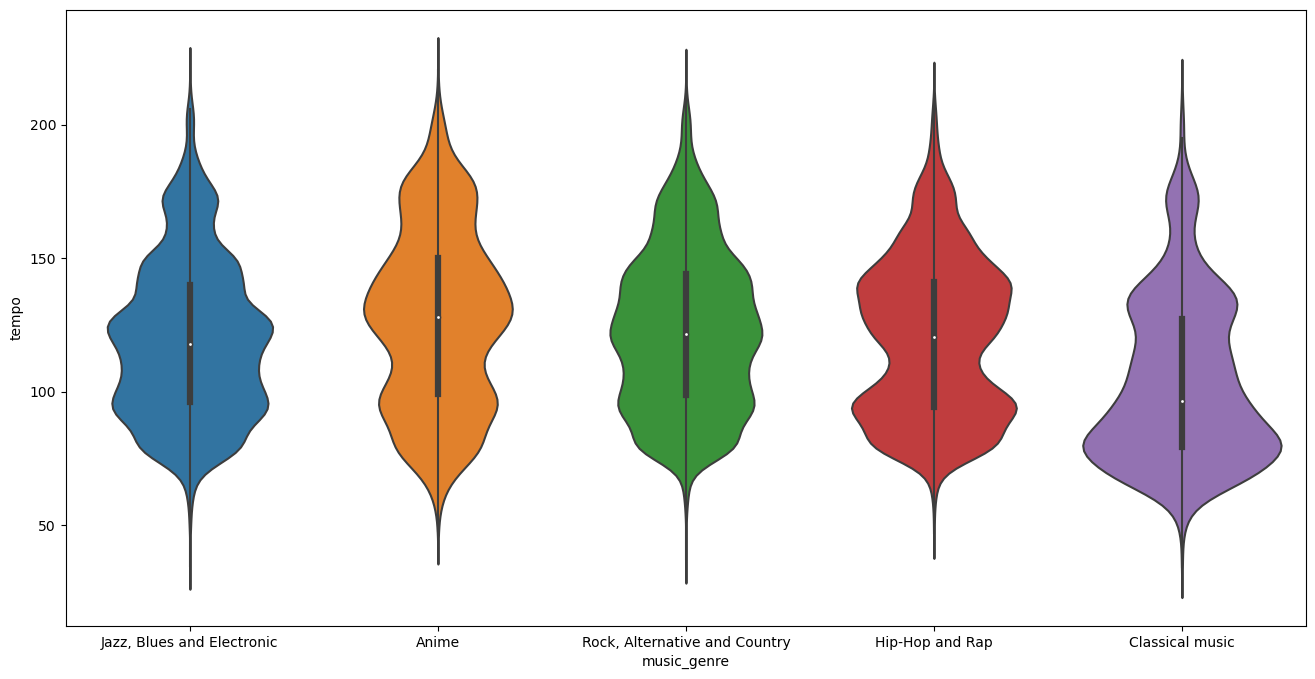

In [71]:
plt.figure(figsize=(16,8))
sns.violinplot(data=data, x='music_genre', y='tempo')
plt.savefig('tempo.png', dpi=300, bbox_inches='tight')


The variation between genres is not great. We'll fill missing values with the median, but consider dropping the feature altogether in the future.¶


In [72]:


median_tempo = data['tempo'].median()
data['tempo'] = data['tempo'].fillna(median_tempo)




Obtained date:¶


In [73]:
data['obtained_date'].unique()

array(['4-Apr', '3-Apr', '5-Apr', '1-Apr', '0/4'], dtype=object)

In [74]:
data.groupby('music_genre')['obtained_date'].describe()

,count,unique,top,freq
music_genre,,,,
Anime,5000,4,4-Apr,4410
Classical music,5000,4,4-Apr,3329
Hip-Hop and Rap,10000,5,4-Apr,9499
"Jazz, Blues and Electronic",15000,4,4-Apr,13488
"Rock, Alternative and Country",15000,4,4-Apr,14022



Only gives the 4 dates at which the data was obtained. Not useful to us, so we'll drop it.¶


In [75]:
data = data.drop(columns=['obtained_date'])


Valence:

In [76]:
data.groupby('music_genre')['valence'].describe()

,count,mean,std,min,25%,50%,75%,max
music_genre,,,,,,,,
Anime,5000.0,0.437670,0.248353,0.0000,0.2320,0.4390,0.63200,0.990
Classical music,5000.0,0.210523,0.197650,0.0000,0.0565,0.1400,0.30525,0.982
Hip-Hop and Rap,10000.0,0.464963,0.217298,0.0336,0.2960,0.4595,0.62800,0.979
"Jazz, Blues and Electronic",15000.0,0.493307,0.251378,0.0205,0.2860,0.4940,0.69500,0.992
"Rock, Alternative and Country",15000.0,0.501535,0.227166,0.0277,0.3250,0.4920,0.67600,0.985


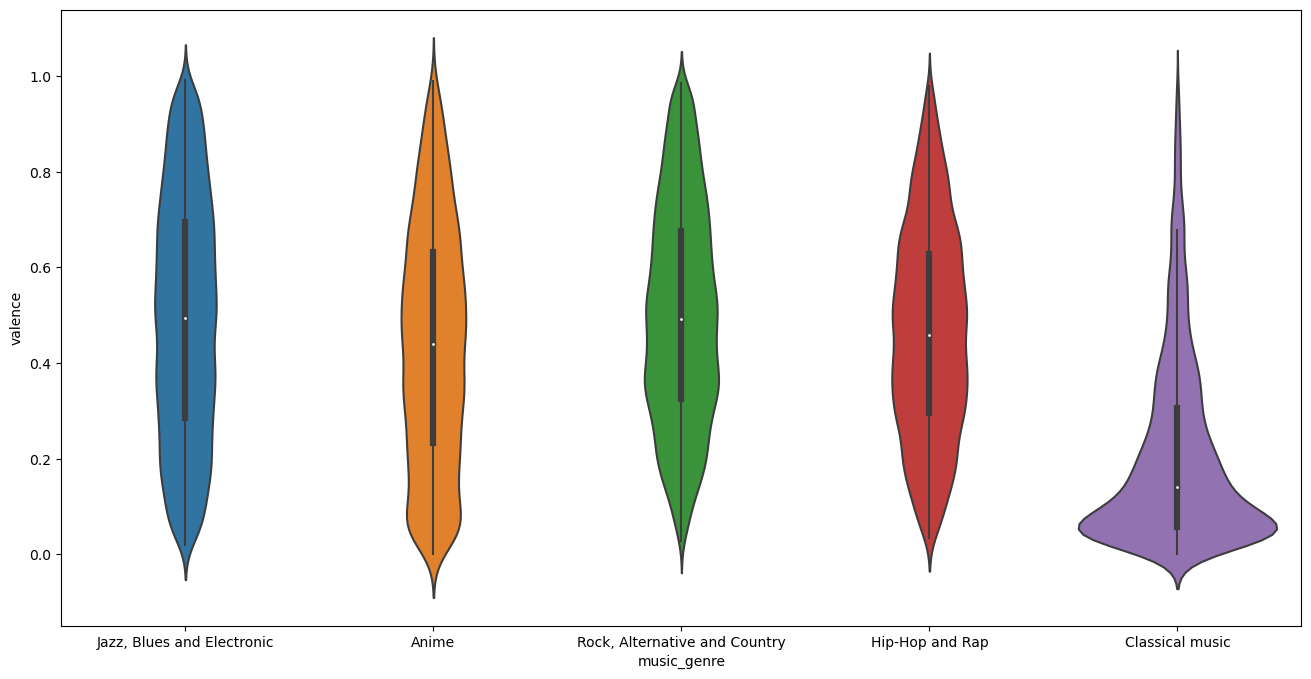

In [77]:
plt.figure(figsize=(16,8))
sns.violinplot(data=data, x='music_genre', y='valence')
plt.savefig('valence.png', dpi=300, bbox_inches='tight')

In [78]:
data.corr()

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
popularity,1.000000,-0.290453,0.356420,-0.103452,0.216345,-0.039468,0.317941,0.224309,0.031194,0.124913,...,-0.020828,0.057932,-0.013707,-0.026405,-0.011515,-0.022585,0.021734,-0.029935,0.030619,0.013427
acousticness,-0.290453,1.000000,-0.347681,0.077440,-0.791250,-0.109220,-0.730401,-0.163377,-0.220799,-0.270238,...,0.034769,-0.072348,0.003584,0.072116,0.006622,0.042503,-0.039442,0.011240,-0.014336,-0.025161
danceability,0.356420,-0.347681,1.000000,-0.188730,0.263934,-0.051465,0.390859,0.279767,-0.014460,0.434557,...,-0.025717,0.081717,-0.032967,-0.049315,-0.039916,-0.011929,0.021827,-0.025522,0.026087,0.049634
duration_ms,-0.103452,0.077440,-0.188730,1.000000,-0.085376,0.026290,-0.127287,-0.101932,-0.041863,-0.163902,...,0.007493,-0.022180,0.010776,0.007794,0.011365,0.012684,-0.011513,0.002689,-0.015995,0.012019
energy,0.216345,-0.791250,0.263934,-0.085376,1.000000,0.186731,0.838399,0.158180,0.248434,0.396317,...,-0.035934,0.047410,0.004286,-0.056890,-0.000849,-0.033356,0.035905,-0.008210,0.009615,0.017878
liveness,-0.039468,-0.109220,-0.051465,0.026290,0.186731,1.000000,0.126504,0.114475,0.037672,0.052110,...,-0.000387,-0.006095,0.009366,-0.022843,0.010445,-0.002088,-0.007766,0.020913,-0.021547,-0.013550
loudness,0.317941,-0.730401,0.390859,-0.127287,0.838399,0.126504,1.000000,0.165578,0.226884,0.340664,...,-0.022549,0.050217,-0.006841,-0.053983,-0.014336,-0.024517,0.033965,-0.017767,0.021347,0.008744
speechiness,0.224309,-0.163377,0.279767,-0.101932,0.158180,0.114475,0.165578,1.000000,0.063377,0.059847,...,-0.047719,0.110845,-0.028830,-0.029018,-0.032603,-0.025316,0.026963,-0.039310,0.035218,0.077379
tempo,0.031194,-0.220799,-0.014460,-0.041863,0.248434,0.037672,0.226884,0.063377,1.000000,0.099316,...,0.010778,0.012422,0.000756,-0.012331,-0.000970,-0.004214,-0.004289,-0.008925,0.007147,-0.018638
valence,0.124913,-0.270238,0.434557,-0.163902,0.396317,0.052110,0.340664,0.059847,0.099316,1.000000,...,-0.011204,-0.011859,-0.009744,-0.028169,-0.021830,0.004837,0.012375,0.016282,0.002918,-0.025427



Again, only classical music truly stands out from the rest.¶


EDA Summary:

Labels:

There are 10 equally likely musical genres (balanced dataset):

    Alternative
    Anime
    Blues
    Classical
    Country
    Electronic
    Hip-Hop
    Jazz
    Rap
    Rock


Features:

Useful features:

    popularity - left as is.
    acousticness - left as is.
    danceability - left as is.
    duration_ms - 10% of the entries had missing values, they were filled in with the median.
    energy - left as is.
    key - a categorical column containing 12 unique categories. One hot encoding was used.
    liveness - left as is with a caveat: may be removed later on due to a lack of variance between genres.
    loudness - left as is.
    mode - a categorical column containing only 2 unique categories. One hot encoding was used.
    speechiness - left as is.
    tempo - contained 10% missing values and missclassified as catagorical. The missing values were filled in with the median and the feature was correctly classified as numerical. Caveat: contains very similar distributions between the genres. might be removed later on.
    valence - left as is.


Unhelpful Features that where removed:

    instance_id - only an index.
    obtained_date - only contains the 4 consecutive dates of data aquisition.
    instrumentalness - contains 30% missing values.
    artist_name and track_name - were used to obtain new features (see below) and then discarded.



New features:

    length_track_name - the track_name feature has essentially been converted to the length of the name. This feature helps identify the classic genre.
    Japanese - This feature indicates wether the track/artist name is written in Japanese. This helps identify the Anime genre.


General observations:

It would appear that most genres tend to have very similar distributions in most features, making it hard for any model to distinguish between them. The obviouse exception is classical music, which has very different distributions in many features. The Anime genre also shows some distinguishing characteristics, as well as Jazz, to a much lesser extent. Hip-Hop and Rap are extremely similar to one another in all features, but are separate from the rest of the genres in some features. They might be easier to identify as one joint genre. All in all, The current features are unlikely to give great predictions for all genres. We'll find out if this is true soon enough.


2. Final Preprocessing



Separate features from labels and encode labels:


In [79]:
data['music_genre'] = data['music_genre'].astype('category')
y = data['music_genre'].cat.codes
y_names = list(data['music_genre'].cat.categories)

X = data.drop(columns=['music_genre'])

In [80]:
scaler = RobustScaler()
scaler.fit(X)
X_scaled = pd.DataFrame(scaler.transform(X), columns=X.columns, index=X.index)

In [81]:
X_scaled.describe()

,popularity,acousticness,danceability,duration_ms,energy,liveness,loudness,speechiness,tempo,valence,...,key_C,key_C#,key_D,key_D#,key_E,key_F,key_F#,key_G,key_G#,mode_Minor
count,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000,50000.000000,50000.000000,...,50000.000000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,-0.035435,0.305231,-0.039833,0.221751,-0.113207,0.461567,-3.265801e-01,0.715843,0.001560,0.021137,...,0.110440,0.10810,0.105300,0.031800,0.075200,0.086820,0.062020,0.114540,0.066380,0.358020
std,0.706455,0.641617,0.729110,1.436517,0.692564,1.098824,1.083698e+00,1.623920,0.681049,0.632017,...,0.313441,0.31051,0.306943,0.175469,0.263716,0.281574,0.241194,0.318469,0.248948,0.479423
min,-2.045455,-0.270677,-2.075102,-2.873053,-1.681173,-0.790823,-6.993054e+00,-0.426111,-2.003443,-1.145780,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.500000,-0.233083,-0.514286,-0.440551,-0.549738,-0.197825,-6.301213e-01,-0.205046,-0.541155,-0.488491,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.808966e-17,0.000000,0.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.766917,0.485714,0.559449,0.450262,0.802175,3.698787e-01,0.794954,0.458845,0.511509,...,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,2.454545,1.601504,1.706122,62.427687,0.931937,5.941536,1.937841e+00,14.306768,2.351631,1.391304,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000



Outlier Removal:


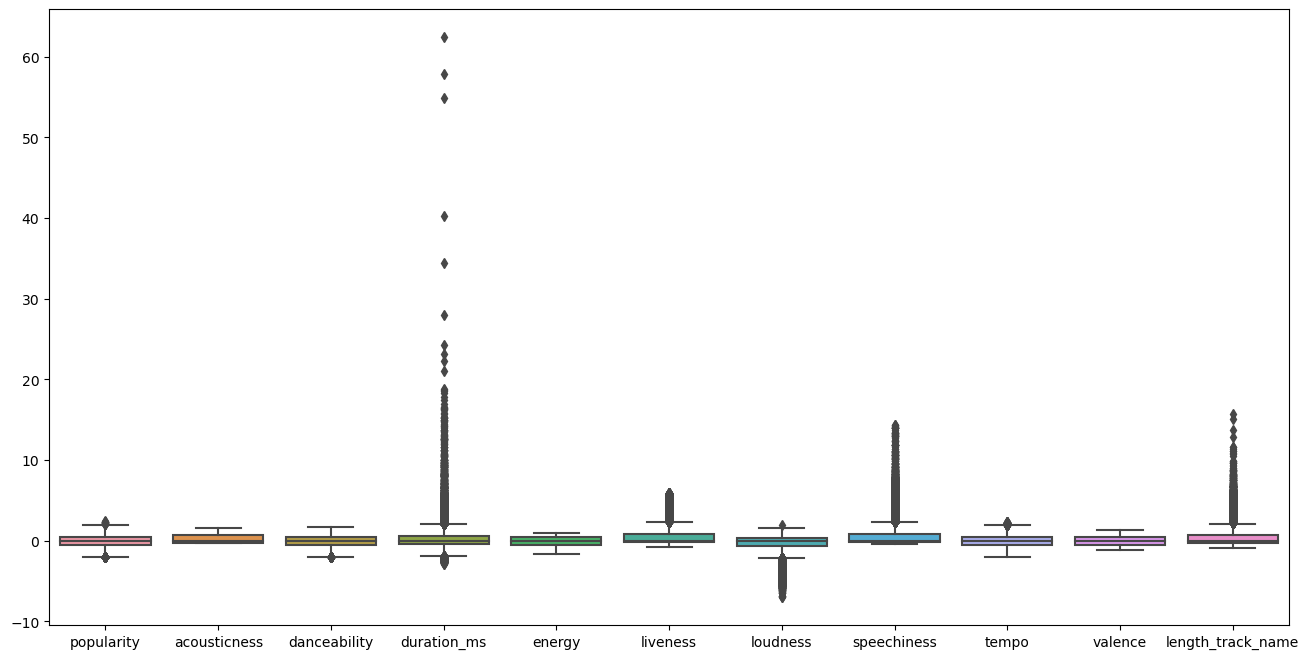

In [82]:


numerical_feats = ['popularity', 'acousticness', 'danceability', 'duration_ms', 'energy',
                   'liveness', 'loudness', 'speechiness', 'tempo', 'valence', 'length_track_name']

plt.figure(figsize=(16,8))
sns.boxplot(data=X_scaled[numerical_feats])
plt.savefig('Outlier_Removal.png', dpi=300, bbox_inches='tight')


As can be clearly seen, some features, especially the duration feature, contain extreme ouliers. These outliers can hinder the success of all models, so we'll remove them.

In [83]:


X_no_outliers = X_scaled[(np.abs(zscore(X_scaled[numerical_feats])) < 4).all(axis=1)]
y_no_outliers = y[X_no_outliers.index]



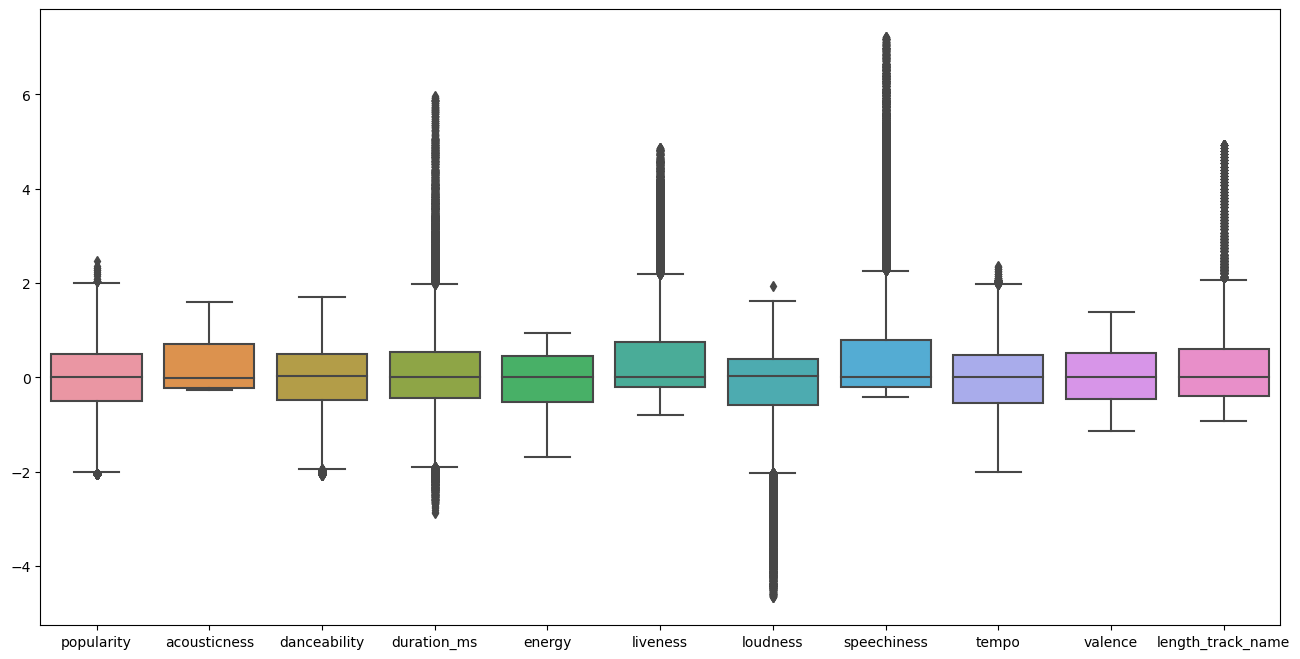

In [84]:
plt.figure(figsize=(16,8))
sns.boxplot(data=X_no_outliers[numerical_feats])
plt.savefig('no_Outlier.png', dpi=300, bbox_inches='tight')

plt.show()



(Note: Some of the features are clearly skewed. However, using log/boxcox on them did not improve the final results, and so it is ommitted here)


Check correlation and reduce dimensionality with PCA:

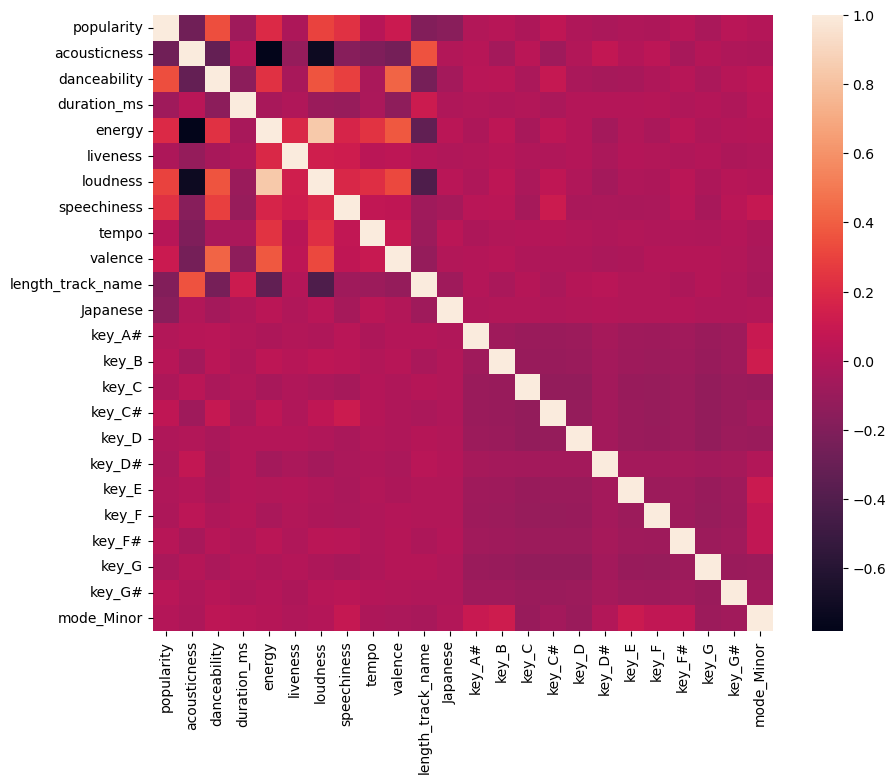

In [85]:


plt.figure(figsize=(10,8))
sns.heatmap(X_no_outliers.corr(), annot=False)
plt.show()




Let's zoom in on the upper left corner where there are some noticeable correlations:


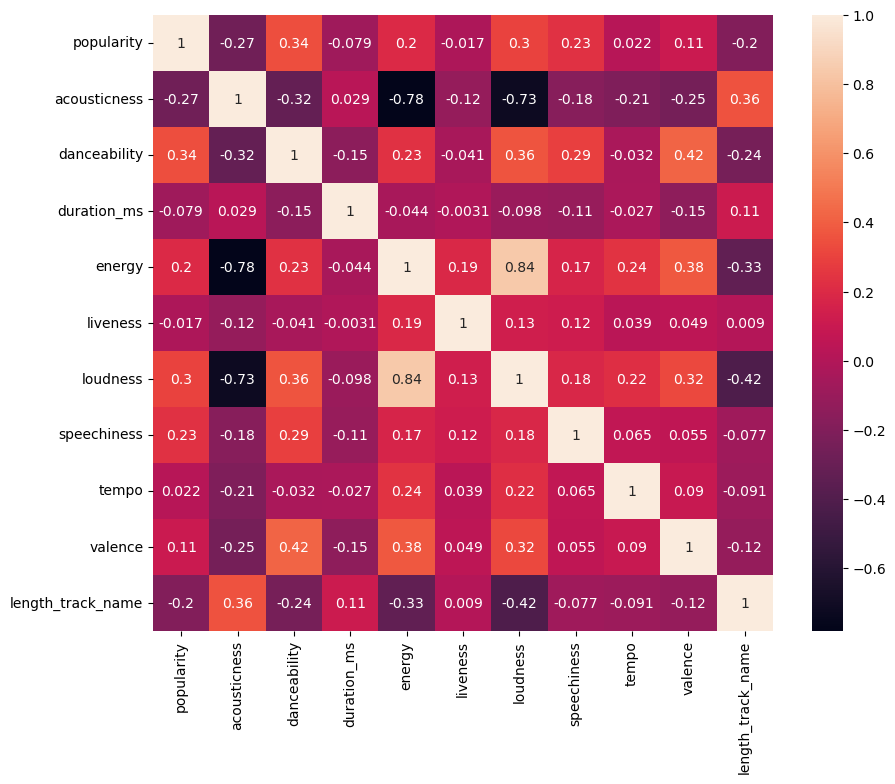

In [86]:


plt.figure(figsize=(10,8))
sns.heatmap(X_no_outliers.iloc[:,:11].corr(), annot=True)
plt.show()



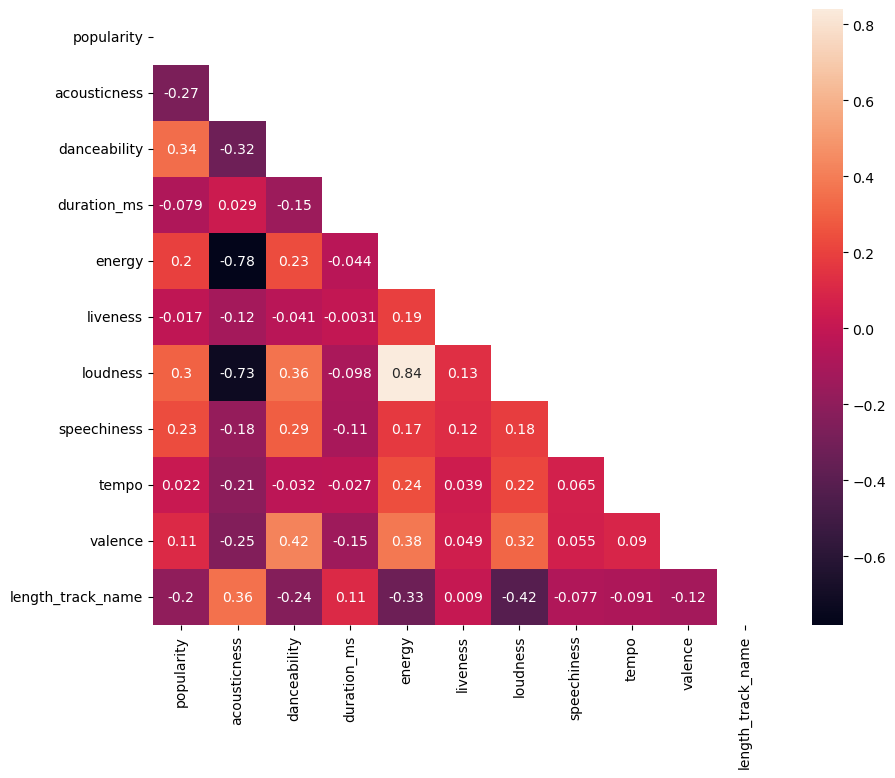

In [87]:
plt.figure(figsize=(10, 8))

# Compute the correlation matrix
corr_matrix = X_no_outliers.iloc[:, :11].corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Plot the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, mask=mask)
plt.savefig('feature correlation.png') # Save pie chart to a file

plt.show()


Loudness, Acousticness and energy are highly correlated. PCA will address this while also reducing the dimesionality of our data set.¶


In [88]:
pca = PCA().fit(X_no_outliers)

# find the first n components that account for 95% of the variance 
cum_exp_var = np.cumsum(pca.explained_variance_ratio_)
n_components = (cum_exp_var <= 0.95).sum()

X_pca = pca.transform(X_no_outliers)[:,:n_components]

In [89]:
X_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48145 entries, 0 to 49999
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   popularity         48145 non-null  float64
 1   acousticness       48145 non-null  float64
 2   danceability       48145 non-null  float64
 3   duration_ms        48145 non-null  float64
 4   energy             48145 non-null  float64
 5   liveness           48145 non-null  float64
 6   loudness           48145 non-null  float64
 7   speechiness        48145 non-null  float64
 8   tempo              48145 non-null  float64
 9   valence            48145 non-null  float64
 10  length_track_name  48145 non-null  float64
 11  Japanese           48145 non-null  float64
 12  key_A#             48145 non-null  float64
 13  key_B              48145 non-null  float64
 14  key_C              48145 non-null  float64
 15  key_C#             48145 non-null  float64
 16  key_D              481

In [90]:


x_train, x_test, y_train, y_test = train_test_split(X_no_outliers, y_no_outliers, test_size=0.3)



In [91]:
from sklearn.model_selection import cross_val_score

def get_metrics(model, X, y, y_names):
    clf = model

    # Split data into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    # Fit the model on the training set
    clf.fit(X_train, y_train)

    # Evaluate the model on the training set using cross-validation
    cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
    print(f"Cross-validation scores: {cv_scores}")
    print(f"Mean CV score: {cv_scores.mean()*100:2.4}%")

    # Make predictions on the training and validation sets
    predict_train = clf.predict(X_train)
    predict_valid = clf.predict(X_valid)

    # Print accuracy scores and classification report for the validation set
    print(f"Train accuracy score: {accuracy_score(y_train, predict_train)*100:2.4}%")
    print(f"Validation accuracy score: {accuracy_score(y_valid, predict_valid)*100:2.4}%\n")
    print('Classification Report for the validation set:\n')
    print(classification_report(y_valid, predict_valid, target_names=y_names))
    
    # Plot the confusion matrix for the validation set
    print('Confusion Matrix:\n')
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_valid, predict_valid), annot = True, fmt = ".0f", 
                cmap = "coolwarm", linewidths = 1, linecolor = "white",
                xticklabels = y_names, yticklabels = y_names)
    
    plt.show()

In [92]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def get_metrics_importance(model, X, y, y_names):
    clf = model

    # Split data into train and validation sets
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.3)

    # Fit the model on the training set
    clf.fit(X_train, y_train)

    # Get feature importances using permutation importance
    result = permutation_importance(clf, X_train, y_train, n_repeats=10)
    importances = result.importances_mean

    # Get the feature names
    feature_names = X.columns

    # Get indices of top 12 features
    top_n_indices = np.argsort(importances)[-12:]

    # Get top 12 feature importances and names
    top_n_importances = importances[top_n_indices]
    top_n_feature_names = feature_names[top_n_indices]

    # Plot feature importances on a pie graph
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.pie(top_n_importances, labels=top_n_feature_names, autopct='%1.1f%%')
    ax.set_title('Feature Importances')
    plt.savefig('pie_chart_top_12_features.png') # Save pie chart to a file
    plt.show()

    # Evaluate the model on the training and validation sets
    predict_train = clf.predict(X_train)
    predict_valid = clf.predict(X_valid)

    # Print accuracy scores and classification report for the validation set
    print(f"Train accuracy score: {accuracy_score(y_train, predict_train)*100:2.4}%")
    print(f"Validation accuracy score: {accuracy_score(y_valid, predict_valid)*100:2.4}%\n")
    print('Classification Report for the validation set:\n')
    print(classification_report(y_valid, predict_valid, target_names=y_names))

    # Plot the confusion matrix for the validation set
    print('Confusion Matrix:\n')
    plt.figure(figsize=(8,6))
    sns.heatmap(confusion_matrix(y_valid, predict_valid), annot = True, fmt = ".0f", 
                cmap = "coolwarm", linewidths = 1, linecolor = "white",
                xticklabels = y_names, yticklabels = y_names)
    plt.show()



SVC

Cross-validation scores: [0.78338279 0.77617635 0.76981772 0.7763883  0.78507842]
Mean CV score: 77.82%
Train accuracy score: 80.31%
Validation accuracy score: 77.38%

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.84      0.71      0.77      1085
              Classical music       0.88      0.79      0.83       874
              Hip-Hop and Rap       0.81      0.84      0.83      2008
   Jazz, Blues and Electronic       0.75      0.74      0.75      3049
Rock, Alternative and Country       0.73      0.78      0.75      3095

                     accuracy                           0.77     10111
                    macro avg       0.80      0.77      0.79     10111
                 weighted avg       0.78      0.77      0.77     10111

Confusion Matrix:



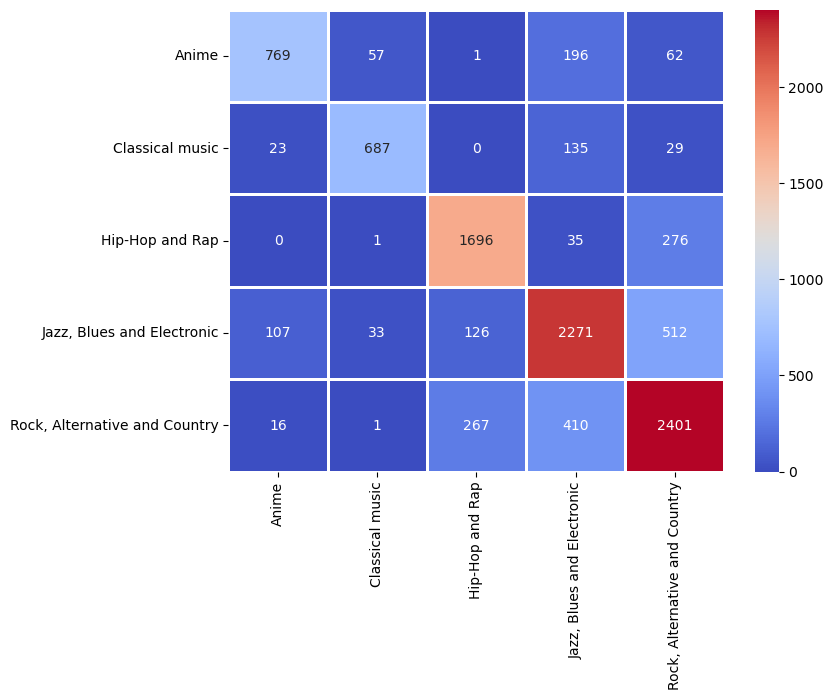

In [93]:
get_metrics(SVC(), x_train, y_train, y_names)

The precision score for each class represents the proportion of true positives among all predicted positives, while the recall score represents the proportion of true positives among all actual positives. The F1-score is the harmonic mean of precision and recall, and provides a balanced measure of the two metrics.

From the report, we can see that the model achieved the highest precision, recall, and F1-score for the Classical music category, followed by Hip-Hop and Rap. The model performed relatively well on the other three categories (Anime, Jazz, Blues and Electronic, and Rock, Alternative and Country) with F1-scores ranging from 0.75 to 0.75.

The overall accuracy of the model on the validation set was 0.77, indicating that the model correctly predicted the genre of the song in 77% of cases. The weighted average of the evaluation metrics was also 0.77, indicating that the model performed similarly well across all categories.



KNN

Cross-validation scores: [0.69203052 0.6935142  0.69097075 0.69542179 0.68206867]
Mean CV score: 69.08%
Train accuracy score: 79.16%
Validation accuracy score: 69.22%

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.70      0.57      0.63      1023
              Classical music       0.82      0.80      0.81       888
              Hip-Hop and Rap       0.71      0.78      0.75      2009
   Jazz, Blues and Electronic       0.67      0.62      0.64      3051
Rock, Alternative and Country       0.67      0.71      0.69      3140

                     accuracy                           0.69     10111
                    macro avg       0.71      0.70      0.70     10111
                 weighted avg       0.69      0.69      0.69     10111

Confusion Matrix:



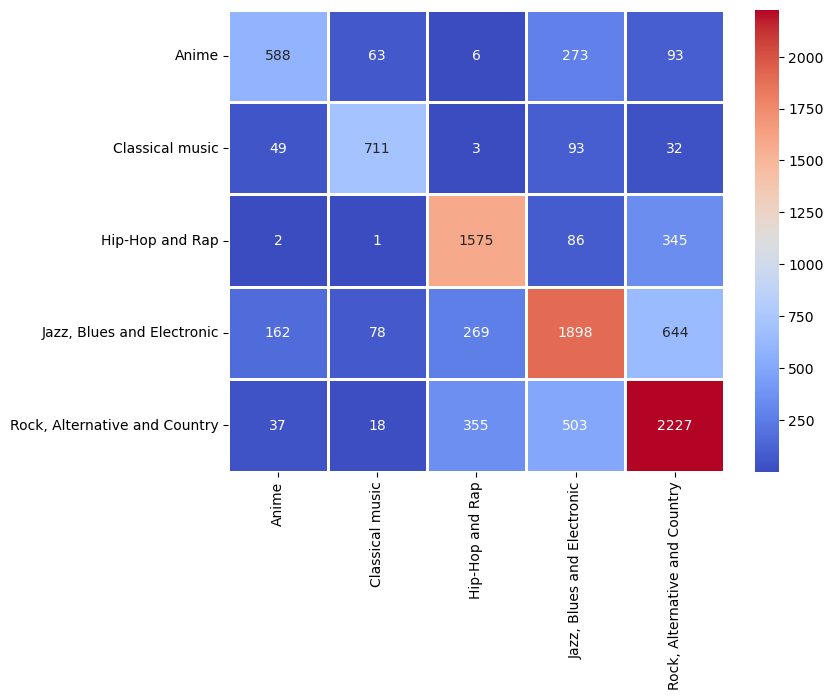

In [94]:
get_metrics(KNeighborsClassifier(), x_train, y_train, y_names)


Random Forest:


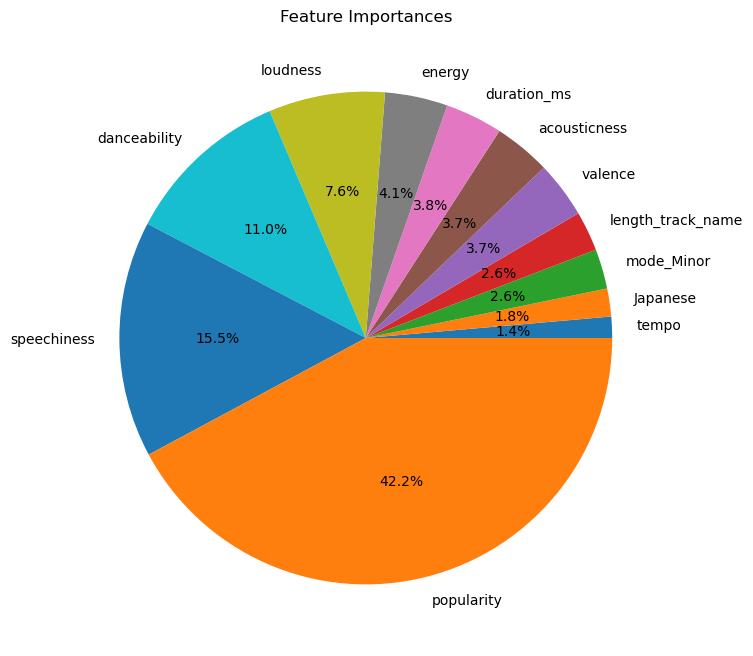

Train accuracy score: 83.89%
Validation accuracy score: 77.98%

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.89      0.67      0.76      1078
              Classical music       0.87      0.80      0.83       892
              Hip-Hop and Rap       0.83      0.86      0.84      2049
   Jazz, Blues and Electronic       0.74      0.76      0.75      3005
Rock, Alternative and Country       0.74      0.77      0.76      3087

                     accuracy                           0.78     10111
                    macro avg       0.81      0.77      0.79     10111
                 weighted avg       0.78      0.78      0.78     10111

Confusion Matrix:



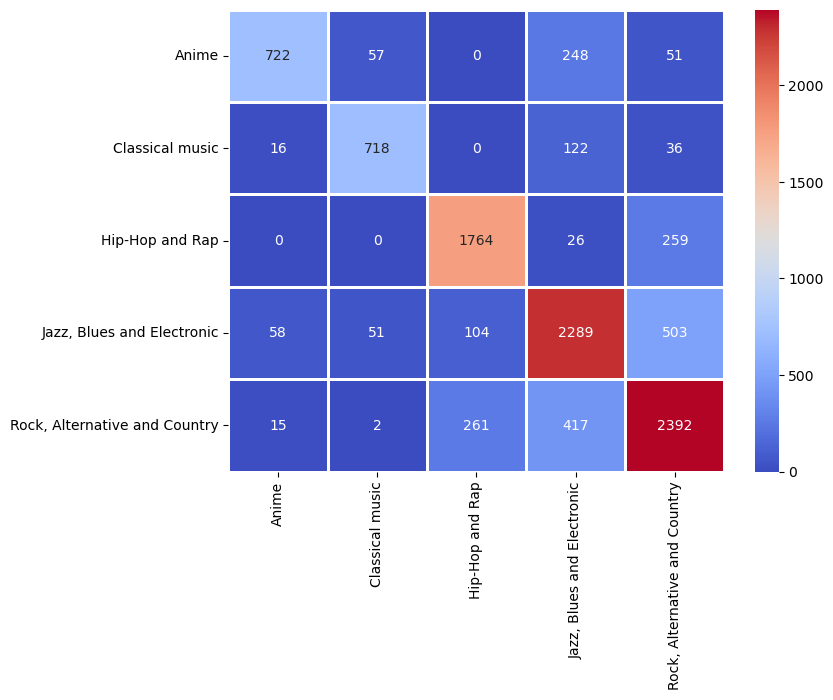

In [95]:
 get_metrics_importance(RandomForestClassifier(n_estimators=50,
    
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=10,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,), x_train, y_train, y_names)

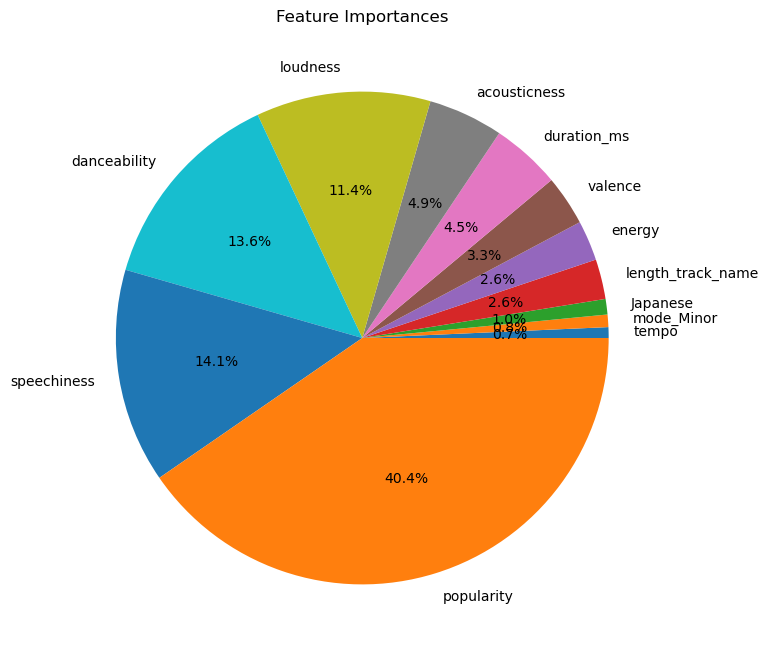

Train accuracy score: 99.79%
Validation accuracy score: 76.89%

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.82      0.72      0.77      1033
              Classical music       0.86      0.78      0.82       887
              Hip-Hop and Rap       0.82      0.84      0.83      2046
   Jazz, Blues and Electronic       0.73      0.74      0.74      3002
Rock, Alternative and Country       0.73      0.77      0.75      3143

                     accuracy                           0.77     10111
                    macro avg       0.79      0.77      0.78     10111
                 weighted avg       0.77      0.77      0.77     10111

Confusion Matrix:



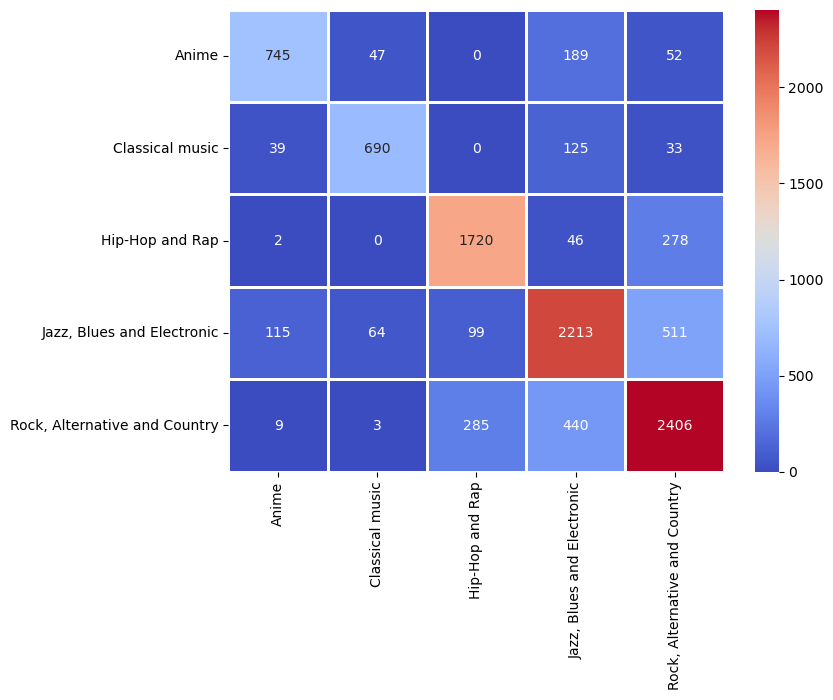

In [96]:
get_metrics_importance(AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=200, algorithm="SAMME.R", learning_rate=0.5), x_train, y_train, y_names)

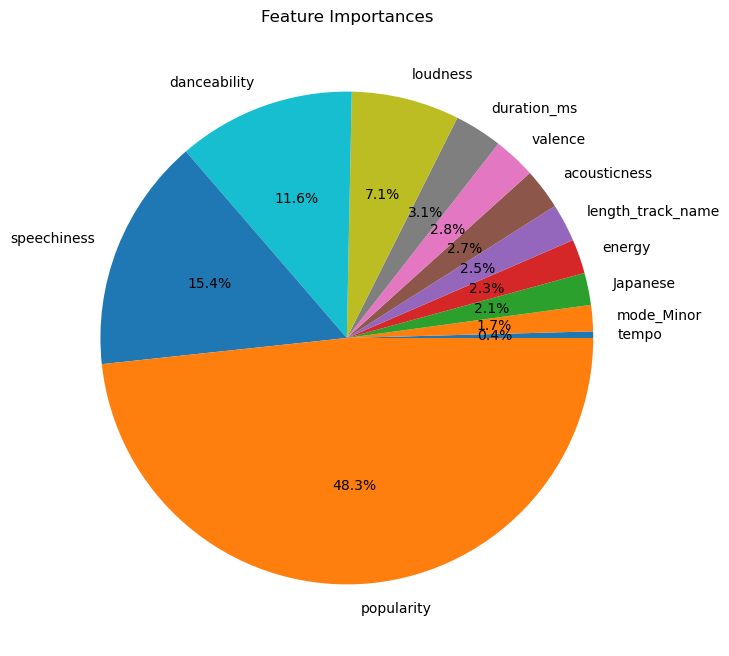

Train accuracy score: 80.42%
Validation accuracy score: 77.95%

Classification Report for the validation set:

                               precision    recall  f1-score   support

                        Anime       0.84      0.73      0.78      1047
              Classical music       0.88      0.78      0.83       893
              Hip-Hop and Rap       0.83      0.84      0.84      2023
   Jazz, Blues and Electronic       0.74      0.75      0.74      3059
Rock, Alternative and Country       0.74      0.79      0.76      3089

                     accuracy                           0.78     10111
                    macro avg       0.81      0.78      0.79     10111
                 weighted avg       0.78      0.78      0.78     10111

Confusion Matrix:



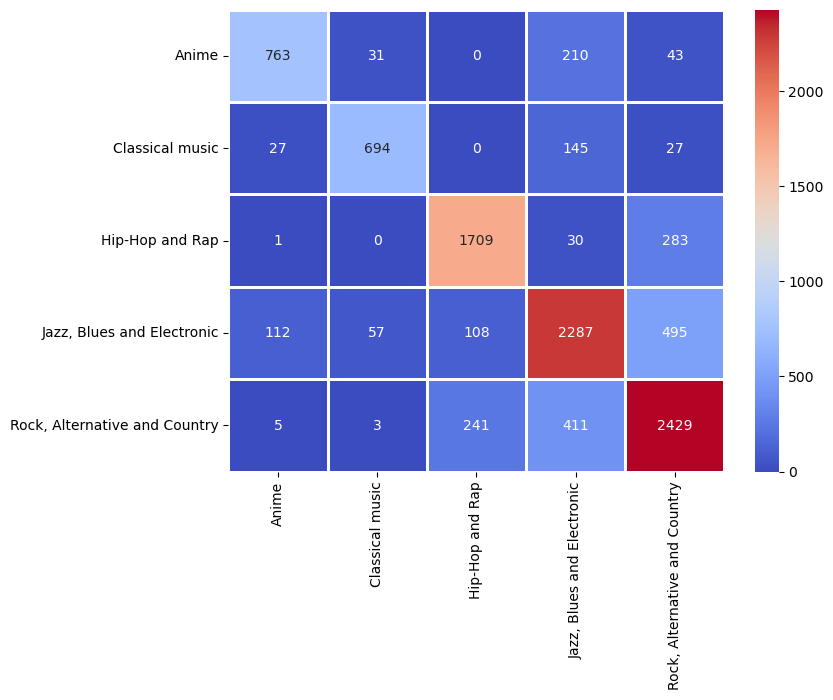

In [97]:
get_metrics_importance(GradientBoostingClassifier(), x_train, y_train, y_names)

Try with less fetures, without PCA, and keeping the outliers in:

SVM, KNN, and Random Forest models were used on the data set, but all yielded bad results (40-50% accuracy). SVM was the best out of a bad bunch.

Possible effects of outliers, dimensionality reduction and missing values were tested and discarded.

The next section will analyze the results in more depth and propose a solution.